## Group Members

Group 35: Our Group is composed by:

  - Filipe Ferreira -20240741
  - Helena Duarte- 20240530
  - Iris Moreira-20240659
  - João Freire-20240528
  - Osmainy Raimundo-e20191506



# THE PROBLEM

* New York Workers' Compensation Board (WCB) handles and reviews a lot of claims for workplace injuries
* Our job is to predict the **"Agreement Reached"** that represents if there is an agreement without the
involvement of the WCB
* <strong>"Agreement Reached"</strong> is our main target variable, and it’s a binary classification problem

## Metadata

- *Accident Date* - Injury date of the claim. 
- *Age at Injury* - Age of injured worker when the injury occurred.
- *Alternative Dispute Resolution* - Adjudication processes external to the Board.
- *Assembly Date* - The date the claim was first assembled.
- *Attorney/Representative* - Is the claim being represented by an Attorney?
- *Average Weekly Wage*  - The wage used to calculate workers’ compensation, disability, or an Paid Leave wage replacement benefits.
- *Birth Year* - The reported year of birth
- of the injured worker.
- *C-2 Date* - Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).
- *C-3 Date* -  Date Form C-3 (Employee Claim Form) was received.
- *Carrier Name* - Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.
- *Carrier Type* - Type of primary insurance provider responsible for providing workers’ compensation coverage.
- *Claim Identifier* - Unique identifier for each claim, assigned by WCB
- *County of Injury* - Name of the New York County where the injury occurred.
- *COVID-19 Indicator* - Indication that the claim may be associated with COVID-19.
- *District Name* - Name of the WCB district office that oversees claims for that region or area of the state.
- *First Hearing Date* - Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held.
- *Gender* - The reported gender of the injured worker.
- *IME-4 Count* - Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form.
- *Industry Code* - NAICS code and descriptions are available at: https://www.naics.com/search-naics-codes-by-industry/.
- *Industry Code Description* - 2-digit NAICS industry code description used to classify businesses according to their economic activity.
- *Medical Fee Region* - Approximate region where the injured worker would receive medical service.
  
- *OIICS Nature of Injury Description* - The OIICS nature of injury codes & descriptions are available at bls.gov/iif/oiics_manual_2007.pemployees_train .
- *WCIO Cause of Injury Code* - The WCIO cause of injury codes & descriptions are at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pemployees_train .
- *WCIO Cause of Injury Description* - See description of field above.
- *WCIO Nature of Injury Code* -The WCIO nature of injury are available at https://wwwn.cdc.gov/wisards/oiics/Trees/MultiTree.aspx?TreeType=BodyPart
- *WCIO Nature of Injury Description* - See description of field above.
- *WCIO Part Of Body Code* - The WCIO part of body codes & descriptions are available at https://wwwn.cdc.gov/wisards/oiics/Trees/MultiTree.aspx?TreeType=BodyPart
- *WCIO Part Of Body Description* - See description of field above.
- *Zip Code* - The reported ZIP code of the injured worker’s home address.
- <strong>Agreement Reached - Binary variable: Yes if there is an agreement without the involvement of the WCB -> unknown at the start of a claim.</strong>
- *WCB Decision* - Multiclass variable: Decision of the WCB relative to the claim: “Accident” means that claim refers to workplace accident, “Occupational Disease” means illness from the workplace. -> requires WCB deliberation so it is unknown at start of claim.
- *Claim Injury Type* - Main target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity.




## Table of Contents

<div class="alert alert-block alert-info">

# Table of Contents
- [1. Importing the necessary libraries](#1)<br>
- [2. Data Cleaning and Pre-Processing](#2)<br>
    - [2.1 Outliers Treatment](#2.1) <br>
    - [2.2 Missing Values Treatment](#2.2) <br>    
- [3. New Features and Aggregations](#3) <br>
- [4. Encoding](#4) <br>
- [5. Scalling](#5) <br>
- [6. Feature Selection](#6) <br>
- [7. Models](#7) <br>


    
</div>

<a class="anchor" id="1">

# Importing the necessary libraries and datasets
    
</a>

In [154]:
#Basic libraries libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from itertools import combinations
from math import ceil

#Exploratory Data Analysis
import scipy.stats as stats
from scipy.stats import chi2_contingency



#Data Pre-Processing
from scipy.stats import f_oneway
import calendar


#Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler



# encoders
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


#Feature Selection
from sklearn.feature_selection import mutual_info_classif

#Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier



# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterSampler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score, roc_curve
from sklearn.inspection import permutation_importance

import time


#Extras
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')

# Importing the Data

In [155]:
#Importing the train data into a variable employees_train
employees_train=pd.read_csv('../Data/employees_train_eda_all.csv', index_col="Claim Identifier")

### Changes made in the EDA notebook

In [156]:
employees_train["Accident Date"] = employees_train["Accident Date"].astype("datetime64[ms]")

employees_train["Age at Injury"] = pd.to_numeric(employees_train["Age at Injury"], errors="coerce").astype("Int64")

employees_train["Assembly Date"] = employees_train["Assembly Date"].astype("datetime64[ms]")

employees_train["Attorney/Representative"]= employees_train["Attorney/Representative"].astype("Int64")

employees_train["Birth Year"]  = pd.to_numeric(employees_train["Birth Year"], errors="coerce").astype("Int64")

employees_train["C-2 Date"] = employees_train["C-2 Date"].astype("datetime64[ms]")

employees_train["C-3 Date"] = employees_train["C-3 Date"].astype("datetime64[ms]")

employees_train["COVID-19 Indicator"]= employees_train["COVID-19 Indicator"].astype("Int64")

employees_train["First Hearing Date"] = employees_train["First Hearing Date"].astype("datetime64[ms]")

employees_train["IME-4 Count"]  = pd.to_numeric(employees_train["IME-4 Count"], errors="coerce").astype("Int64")

employees_train["Industry Code"] = employees_train["Industry Code"].astype("object")

employees_train["WCIO Cause of Injury Code"] = employees_train["WCIO Cause of Injury Code"].astype("object")

employees_train["WCIO Nature of Injury Code"] = employees_train["WCIO Nature of Injury Code"].astype("object")

employees_train["WCIO Part Of Body Code"] = employees_train["WCIO Part Of Body Code"].astype("object")

employees_train["Zip Code"] = employees_train["Zip Code"].astype("string")

employees_train["Number of Dependents"] = employees_train["Number of Dependents"].astype("Int64")

<a class="anchor" id="2">

# Data Cleaning and Pre-Processing
    
</a>

In [157]:
def overview(data):
    column = []
    dtypes = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in data.columns:
        column.append(item) # feature name
        dtypes.append(data[item].dtype) # data type
        unique.append(len(data[item].unique())) # how many unique values in the feature
        missing.append(data[item].isna().sum()) # amount of missing values
        pc_missing.append(round((data[item].isna().sum() / len(data[item])) * 100, 2)) # percentage of missing values
    
    result = pd.DataFrame({
        'Column': column, 
        'Type': dtypes,
        'Unique': unique,
        'Missing': missing, 
        'Percentage Missing': pc_missing
    })
    
    return result

In [158]:
overview(employees_train)

,Column,Type,Unique,Missing,Percentage Missing
0,Accident Date,datetime64[ms],5540,3689,0.64
1,Age at Injury,Int64,108,0,0.00
2,Alternative Dispute Resolution,object,3,0,0.00
3,Assembly Date,datetime64[ms],897,0,0.00
4,Attorney/Representative,Int64,2,0,0.00
5,Average Weekly Wage,float64,120025,28651,4.99
6,Birth Year,Int64,108,29078,5.07
7,C-2 Date,datetime64[ms],2476,14560,2.54
8,C-3 Date,datetime64[ms],1649,386781,67.38
9,Carrier Name,object,2046,0,0.00


## Splitting the data

In [159]:
X = employees_train.drop(['Agreement Reached'], axis=1)
target = employees_train[['Agreement Reached']]

In [160]:
X_train, X_val, target_train, target_val= train_test_split(X,target, test_size=0.3,
                                                 random_state=42,
                                                 stratify=target,
                                                 shuffle=True) 

In [161]:
X_train_original = X_train.copy()

In [162]:
metric_feats = ["Age at Injury", "Average Weekly Wage", "Birth Year", "Number of Dependents"]

## Substitute 0 at 'birth year' and 'age at injury' with nan

* There are claims where “Age at Injury” is “0”. 
* This is the case when the necessary information needed for this calculation is missing from the case, as said on New York's Compensation Board.

In [163]:
X_train.loc[:, 'Birth Year'] = X_train['Birth Year'].apply(lambda x: np.nan if pd.notna(x) and x == 0 else x)

In [164]:
X_train.loc[:, 'Age at Injury'] = X_train['Age at Injury'].apply(lambda x: np.nan if pd.notna(x) and x == 0 else x)

In [165]:
overview(X_train)

,Column,Type,Unique,Missing,Percentage Missing
0,Accident Date,datetime64[ms],4615,2613,0.65
1,Age at Injury,Int64,106,3878,0.97
2,Alternative Dispute Resolution,object,3,0,0.00
3,Assembly Date,datetime64[ms],888,0,0.00
4,Attorney/Representative,Int64,2,0,0.00
5,Average Weekly Wage,float64,93255,20063,4.99
6,Birth Year,Int64,106,37841,9.42
7,C-2 Date,datetime64[ms],2157,10237,2.55
8,C-3 Date,datetime64[ms],1604,270715,67.37
9,Carrier Name,object,1977,0,0.00


**Substituting in the Validation Data**

In [166]:
X_val.loc[:, 'Birth Year'] = X_val['Birth Year'].apply(lambda x: np.nan if pd.notna(x) and x == 0 else x)

In [167]:
X_val.loc[:, 'Age at Injury'] = X_val['Age at Injury'].apply(lambda x: np.nan if pd.notna(x) and x == 0 else x)

<a class="anchor" id="2.1">

## Outliers Treatment
    
</a>

In [168]:
outlier_percentages = {}

# We know that low outliers are below Q 1 − 1.5 ⋅ IQR ‍ and high outliers are above Q 3 + 1.5 ⋅ IQR 
for column in metric_feats:
    if pd.api.types.is_numeric_dtype(X_train[column]):
        #Defining Q1 and Q3 to then find IQR 
        Q1 = X_train[column].quantile(0.25)
        Q3 = X_train[column].quantile(0.75)
        IQR = Q3 - Q1
        #Getting the outliers below the first quantile and above the second quantile
        outliers = X_train[(X_train[column] < (Q1 - 1.5 * IQR)) | (X_train[column] > (Q3 + 1.5 * IQR))]
        #Getting the percentage of the outliers
        percentage_outliers = (len(outliers) / len(X_train)) * 100
        outlier_percentages[column] = percentage_outliers

#Printing the results and counting the number of columns per the percentage higher or lower than 5.
nr_col_lower_5=0
nr_col_higher_5=0
print("Percentage of outliers per column using IQR:")
for column, percentage in outlier_percentages.items():
    print(f"{column}: \033[1;35m{percentage:.2f}%\033[0m")
    if percentage <5:
        nr_col_lower_5+=1
    if percentage >5:
        nr_col_higher_5+=1

#Printing the number of columns who have a percentage lower than 5% and then higher than 5%. 
# We chose 5% becasue it was the percentage advised during classes
print(f"From the columns, \033[1;33m{nr_col_lower_5}\033[0m have a percentage lower than 5%")
print(f"From the columns, \033[1;33m{nr_col_higher_5}\033[0m have a percentage higher than 5%")

Percentage of outliers per column using IQR:
Age at Injury: 0.03%
Average Weekly Wage: 3.89%
Birth Year: 0.06%
Number of Dependents: 0.00%
From the columns, 4 have a percentage lower than 5%
From the columns, 0 have a percentage higher than 5%


### Visualization through boxplots and histograms

In [169]:
def stats_analysis(df, columns):
    
    result = []
    
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        result.append({"Column": col,"Lower Bound": lower_bound,
                         "Min": df[col].min(),"Q1": q1,"Median": df[col].median(),
                         "IQR": iqr,"Q3": q3,"Upper Bound": upper_bound,"Max": df[col].max(),})  

    return pd.DataFrame(result)

def compute_lims(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_lim = q1 - (1.5 * iqr)
    upper_lim = q3 + (1.5 * iqr)
    return lower_lim, upper_lim

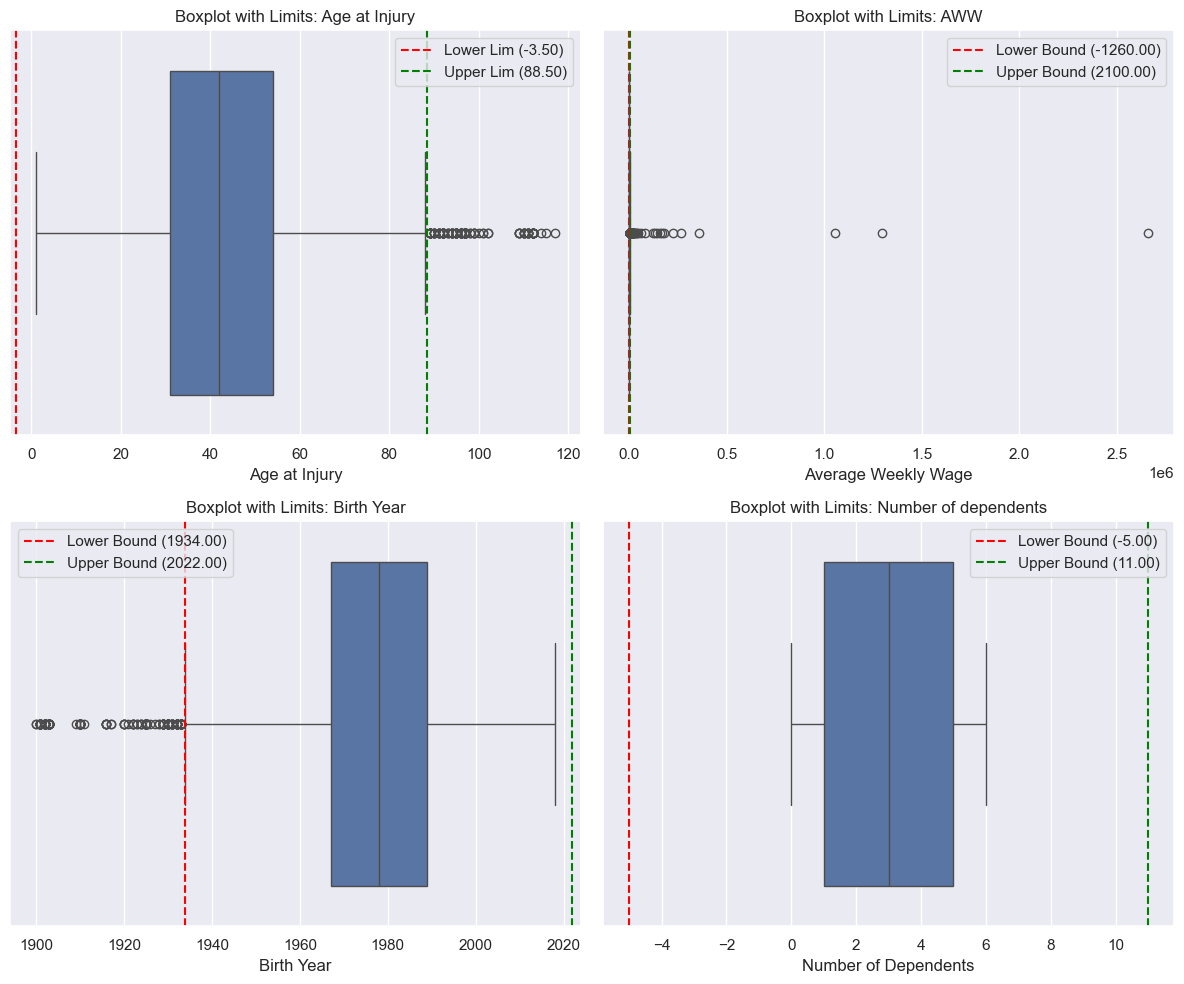

In [170]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

col_1 = "Age at Injury"
lower_lim_1, upper_bound_1 = compute_lims(X_train, col_1)
sns.boxplot(X_train, x= col_1, ax=axes[0, 0])
axes[0, 0].axvline(lower_lim_1, color='red', linestyle='--', label=f'Lower Lim ({lower_lim_1:.2f})')
axes[0, 0].axvline(upper_bound_1, color='green', linestyle='--', label=f'Upper Lim ({upper_bound_1:.2f})')
axes[0, 0].set_title("Boxplot with Limits: Age at Injury")
axes[0, 0].legend()


col_2 = "Average Weekly Wage"
lower_lim_2, upper_bound_2 = compute_lims(X_train, col_2)
sns.boxplot(X_train,  x= col_2, ax=axes[0, 1])
axes[0, 1].axvline(lower_lim_2, color='red', linestyle='--', label=f'Lower Bound ({lower_lim_2:.2f})')
axes[0, 1].axvline(upper_bound_2, color='green', linestyle='--', label=f'Upper Bound ({upper_bound_2:.2f})')
axes[0, 1].set_title("Boxplot with Limits: AWW")
axes[0, 1].legend()


col_3 = "Birth Year"
lower_lim_3, upper_bound_3 = compute_lims(X_train, col_3)
sns.boxplot(X_train, x=col_3, ax=axes[1, 0])
axes[1, 0].axvline(lower_lim_3, color='red', linestyle='--', label=f'Lower Bound ({lower_lim_3:.2f})')
axes[1, 0].axvline(upper_bound_3, color='green', linestyle='--', label=f'Upper Bound ({upper_bound_3:.2f})')
axes[1, 0].set_title("Boxplot with Limits: Birth Year")
axes[1, 0].legend()


col_4 = "Number of Dependents"
lower_lim_4, upper_bound_4 = compute_lims(X_train, col_4)
sns.boxplot(X_train, x= col_4, ax=axes[1, 1])
axes[1, 1].axvline(lower_lim_4, color='red', linestyle='--', label=f'Lower Bound ({lower_lim_4:.2f})')
axes[1, 1].axvline(upper_bound_4, color='green', linestyle='--', label=f'Upper Bound ({upper_bound_4:.2f})')
axes[1, 1].set_title("Boxplot with Limits: Number of dependents")
axes[1, 1].legend()


plt.tight_layout()
plt.show()

**`Age at Injury`**

In [171]:
pd.DataFrame(X_train["Age at Injury"].describe(percentiles=[0.05,0.95,0.99,0.995,0.999])).T

,count,mean,std,min,5%,50%,95%,99%,99.5%,99.9%,max
Age at Injury,397940.0,42.507795,13.714929,1.0,22.0,42.0,64.0,71.0,75.0,82.0,117.0


Since the upper bound is close to the 99.9% , we decided to remove by the highest value, which is the upper bound,

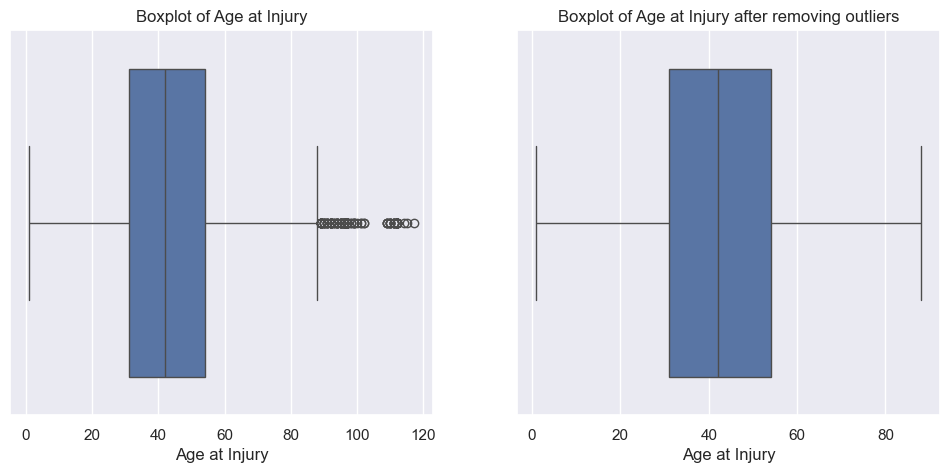

In [172]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))

sns.boxplot(X_train, x="Age at Injury", ax=axes[0])
axes[0].set_title("Boxplot of Age at Injury")

sns.boxplot(X_train[X_train["Age at Injury"] < 88.5], x="Age at Injury", ax=axes[1])
axes[1].set_title("Boxplot of Age at Injury after removing outliers")


plt.show()

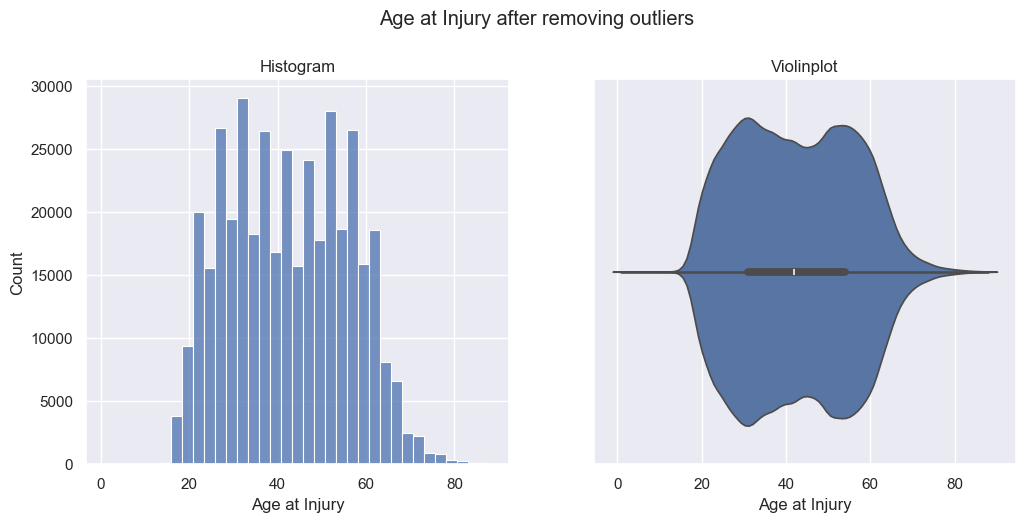

In [173]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))

sns.histplot(X_train[X_train["Age at Injury"] < 88.5], x="Age at Injury", bins=35, ax=axes[0])
axes[0].set_title("Histogram")

sns.violinplot(X_train[X_train["Age at Injury"] < 88.5], x="Age at Injury", ax=axes[1])
axes[1].set_title("Violinplot")

plt.suptitle("Age at Injury after removing outliers", y=1.02)
plt.show()

**`Average Weekly Wage`**

In [174]:
pd.DataFrame(X_train["Average Weekly Wage"].describe(percentiles=[0.05,0.95,0.99,0.995,0.999])).T

,count,mean,std,min,5%,50%,95%,99%,99.5%,99.9%,max
Average Weekly Wage,381755.0,487.156676,5240.821169,0.0,0.0,0.0,1977.883,2967.7278,3468.4127,4737.79664,2659398.0


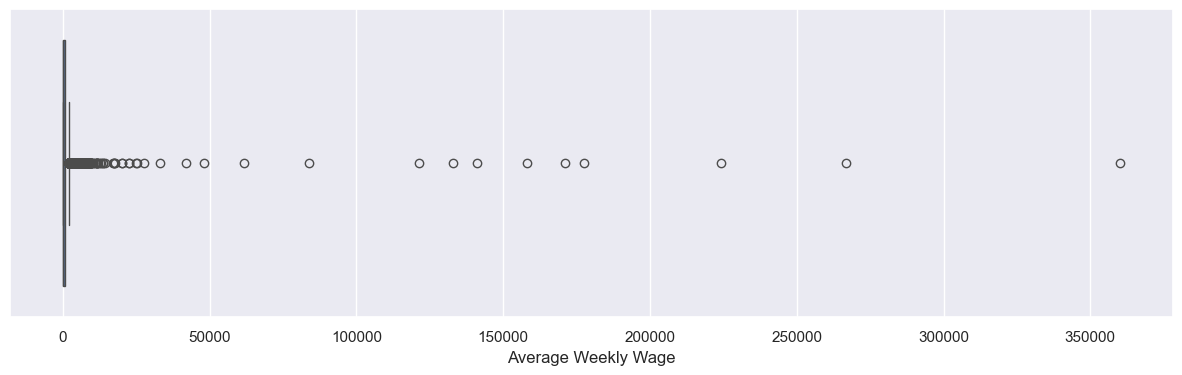

In [175]:
fig,axes=plt.subplots(figsize=(15,4))
sns.boxplot(X_train[X_train["Average Weekly Wage"] < 5e5], x="Average Weekly Wage")
plt.show()

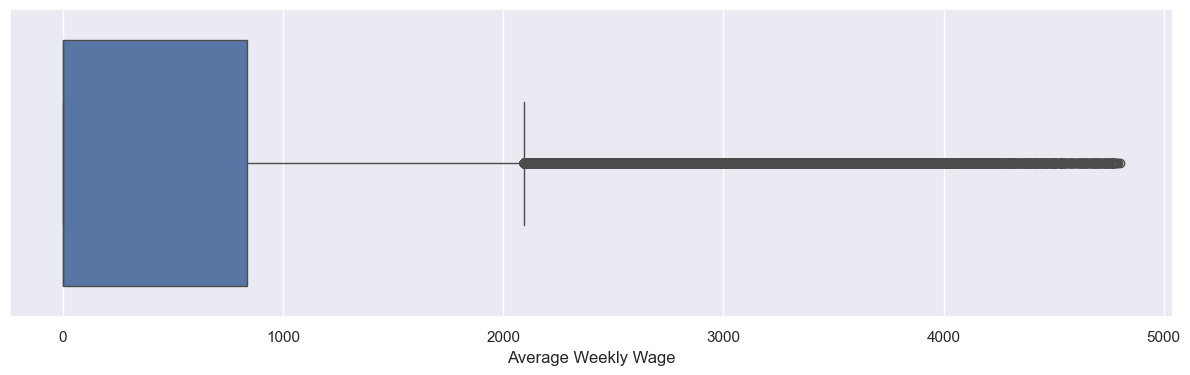

In [176]:
fig,axes=plt.subplots(figsize=(15,4))
sns.boxplot(X_train[X_train["Average Weekly Wage"] < 4800], x="Average Weekly Wage")
plt.show()

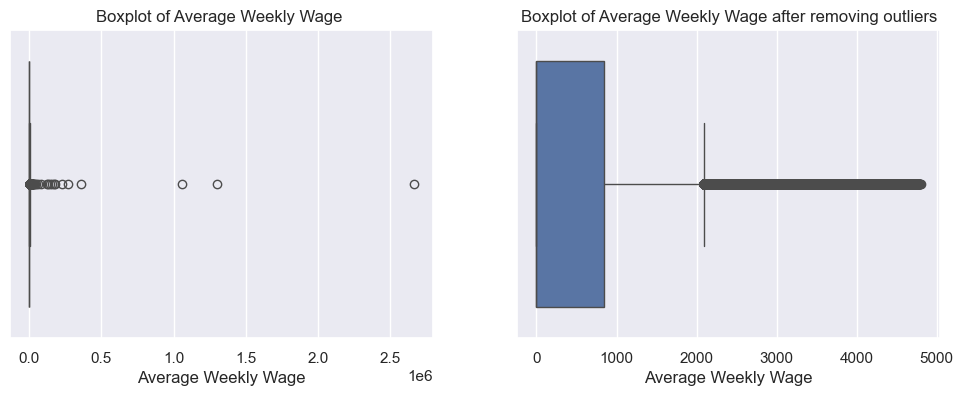

In [177]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))

sns.boxplot(X_train, x= "Average Weekly Wage", ax=axes[0])
axes[0].set_title("Boxplot of Average Weekly Wage ")


sns.boxplot(X_train[(X_train["Average Weekly Wage"] < 4800)],  x= "Average Weekly Wage", ax=axes[1])
axes[1].set_title("Boxplot of Average Weekly Wage after removing outliers")


plt.show()

In [178]:
#outliers statistics
pd.DataFrame(X_train[X_train["Average Weekly Wage"] > 4800]["Average Weekly Wage"].describe()).T

,count,mean,std,min,25%,50%,75%,max
Average Weekly Wage,353.0,26175.935779,168968.546754,4803.91,5019.73,5393.79,6926.49,2659398.0


**`Birth Year`**

In [179]:
pd.DataFrame(X_train["Birth Year"].describe(percentiles=[0.001,0.01,0.05,0.1])).T

,count,mean,std,min,0.1%,1%,5%,10%,50%,max
Birth Year,363977.0,1977.803408,13.840214,1900.0,1937.0,1949.0,1956.0,1960.0,1978.0,2018.0


In [180]:
stats_analysis(X_train,["Birth Year"])

,Column,Lower Bound,Min,Q1,Median,IQR,Q3,Upper Bound,Max
0,Birth Year,1934.0,1900,1967,1978.0,22,1989,2022.0,2018


Since the lower bound is close to the 0.1% , we decided to remove by the lowest value, which is the lower bound.

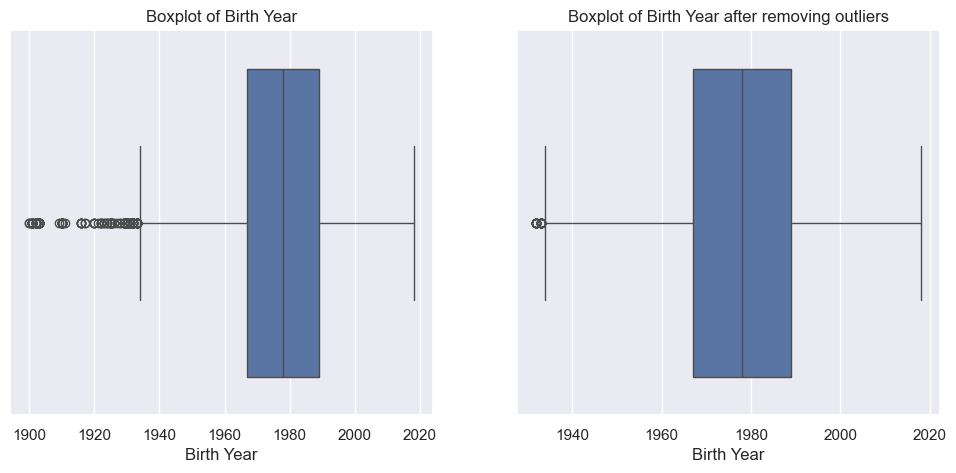

In [181]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))

sns.boxplot(X_train, x="Birth Year", ax=axes[0])
axes[0].set_title("Boxplot of Birth Year")

sns.boxplot(X_train[X_train["Birth Year"] > 1931.5], x="Birth Year", ax=axes[1])
axes[1].set_title("Boxplot of Birth Year after removing outliers")


plt.show()

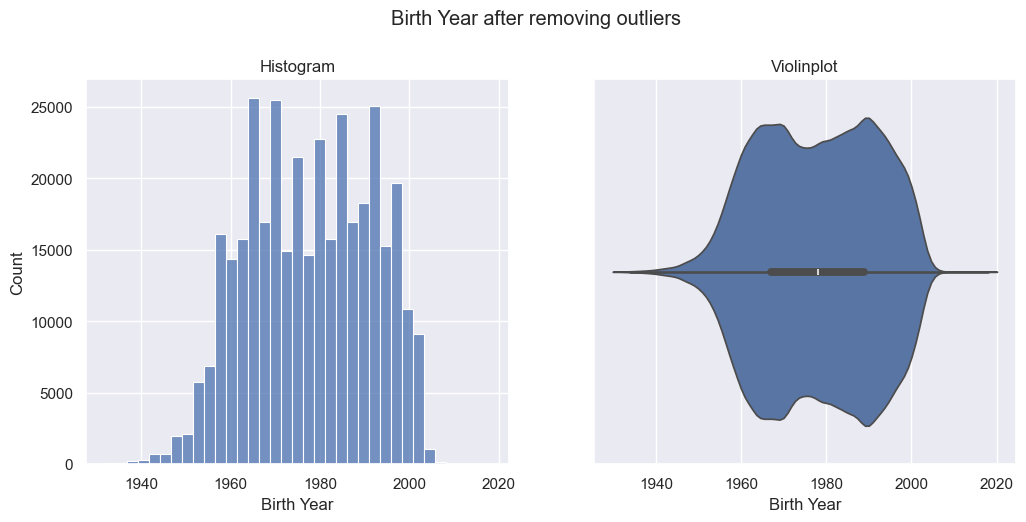

In [182]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))

sns.histplot(X_train[X_train["Birth Year"] > 1931.5], x="Birth Year", bins=35, ax=axes[0])
axes[0].set_title("Histogram")

sns.violinplot(X_train[X_train["Birth Year"] > 1931.5], x="Birth Year", ax=axes[1])
axes[1].set_title("Violinplot")

plt.suptitle("Birth Year after removing outliers", y=1.02)
plt.show()

**`Number of dependents`**<br>
By the IQR and previous EDA, we conclude this variable does not have outliers.

In [183]:
len(X_train[(X_train['Age at Injury'] > 88.5) | (X_train['Average Weekly Wage'] > 4800) |(X_train['Birth Year']<1931.5)])/len(X_train)*100

0.1445928256076134

In [184]:
overview(X_train[(X_train['Age at Injury'] > 88.5) | (X_train['Average Weekly Wage'] > 4800) |(X_train['Birth Year']<1931.5)])

,Column,Type,Unique,Missing,Percentage Missing
0,Accident Date,datetime64[ms],448,0,0.00
1,Age at Injury,Int64,81,73,12.56
2,Alternative Dispute Resolution,object,1,0,0.00
3,Assembly Date,datetime64[ms],400,0,0.00
4,Attorney/Representative,Int64,2,0,0.00
5,Average Weekly Wage,float64,379,9,1.55
6,Birth Year,Int64,74,66,11.36
7,C-2 Date,datetime64[ms],398,2,0.34
8,C-3 Date,datetime64[ms],207,351,60.41
9,Carrier Name,object,127,0,0.00


### Removing outliers

In [185]:
X_train = X_train[(X_train['Age at Injury'] < 88.5) | (X_train['Age at Injury'].isna())]


In [186]:
round(len(X_train)/len(X_train_original)*100,2)

99.97

In [187]:
X_train = X_train[(X_train['Average Weekly Wage'] < 4800) | (X_train['Average Weekly Wage'].isna())]


In [188]:
round(len(X_train)/len(X_train_original)*100,2)

99.88

In [189]:
X_train =  X_train[(X_train['Birth Year'] > 1931.5) | (X_train['Birth Year'].isna())]

In [190]:
round(len(X_train)/len(X_train_original)*100,2)

99.85

Aligning the target to the filtered X_train after outlier removal, to avoid having different number of rows.

In [191]:
target_train = target_train.loc[X_train.index]

<a class="anchor" id="2.2">

## Missing Values Treatment
    
</a>

In [192]:
overview(X_train)

,Column,Type,Unique,Missing,Percentage Missing
0,Accident Date,datetime64[ms],4597,2613,0.65
1,Age at Injury,Int64,85,3805,0.95
2,Alternative Dispute Resolution,object,3,0,0.00
3,Assembly Date,datetime64[ms],888,0,0.00
4,Attorney/Representative,Int64,2,0,0.00
5,Average Weekly Wage,float64,92892,20054,5.00
6,Birth Year,Int64,85,37775,9.41
7,C-2 Date,datetime64[ms],2157,10235,2.55
8,C-3 Date,datetime64[ms],1603,270363,67.38
9,Carrier Name,object,1976,0,0.00


### Accident Date and C-2 Date - TODO DÚVIDAS
Imputation based on the median difference between the accident date and assembly date and C-2 date and Assembly date, since these timelines should not differ much from case to case.

In [193]:
#Calculating the difference of the dates we want to fill with Assembly date
treat_NaT = X_train[['Accident Date', 'C-2 Date', 'Assembly Date']].copy()
treat_NaT['diff_Accid_AD'] = treat_NaT['Assembly Date'] - treat_NaT['Accident Date']
treat_NaT['diff_C2_AD'] = treat_NaT['Assembly Date'] - treat_NaT['C-2 Date']
print('Median:\n', treat_NaT[['diff_Accid_AD', 'diff_C2_AD']].median(axis=0))
print('\nMean:\n', treat_NaT[['diff_Accid_AD', 'diff_C2_AD']].mean(axis=0))
print('\nMode:\n', treat_NaT[['diff_Accid_AD', 'diff_C2_AD']].mode(axis=0))

Median:
 diff_Accid_AD   10 days 00:00:00
diff_C2_AD       0 days 00:00:00
dtype: timedelta64[ms]

Mean:
 diff_Accid_AD   81 days 18:53:27.525000
diff_C2_AD       3 days 21:51:42.003000
dtype: timedelta64[ms]

Mode:
     diff_Accid_AD diff_C2_AD
0 6 days 00:00:00     0 days


In [194]:
# plt.figure(figsize=(12, 6))
# sns.violinplot(x=treat_NaT['diff_Accid_AD'].dt.days, color='blue')
# plt.title('Violinplot of Days Difference Between Accident and Assembly Dates', fontsize=15)
# plt.xlabel('Days Difference', fontsize=12)
# plt.tight_layout()
# plt.show()

In [195]:
# plt.figure(figsize=(12, 6))
# sns.histplot(x=treat_NaT['diff_Accid_AD'].dt.days, color='blue', bins=35)
# plt.title('Boxplot of Days Difference Between Accident and Assembly Dates', fontsize=15)
# plt.xlabel('Days Difference', fontsize=12)
# plt.tight_layout()
# plt.show()

In [196]:
# plt.figure(figsize=(12, 6))
# sns.violinplot(x=treat_NaT['diff_C2_AD'].dt.days, color='blue')
# plt.title('Violinplot of Days Difference Between Accident and C2 Dates', fontsize=15)
# plt.xlabel('Days Difference', fontsize=12)
# plt.tight_layout()
# plt.show()

In [197]:
# plt.figure(figsize=(12, 6))
# sns.histplot(x=treat_NaT['diff_C2_AD'].dt.days, color='blue', bins=100)
# plt.title('Boxplot of Days Difference Between C2 and Assembly Dates', fontsize=15)
# plt.xlabel('Days Difference', fontsize=12)
# plt.tight_layout()
# plt.show()

In [198]:
treat_NaT[treat_NaT['diff_Accid_AD'].dt.days<0]['diff_Accid_AD'].describe()

count                          990
mean     -71 days +16:17:27.273000
std       108 days 23:31:07.390000
min           -1127 days +00:00:00
25%             -78 days +00:00:00
50%             -31 days +00:00:00
75%             -14 days +00:00:00
max              -1 days +00:00:00
Name: diff_Accid_AD, dtype: object

In [199]:
treat_NaT['diff_C2_AD'].describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99,0.995])

count                      391000
mean       3 days 21:51:42.003000
std      259 days 09:07:50.079000
min          -1466 days +00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%               0 days 00:00:00
90%               1 days 00:00:00
95%               2 days 00:00:00
99%               3 days 00:00:00
99.5%             6 days 00:00:00
max            9664 days 00:00:00
Name: diff_C2_AD, dtype: object

**`Filling missing values of 'Accident Date' and 'C2-Date' on the training data`**

In [200]:
X_train.loc[X_train['Accident Date'].isna(), 'Accident Date'] = X_train['Assembly Date']-treat_NaT['diff_Accid_AD'].median(axis=0)
X_train.loc[X_train['C-2 Date'].isna(), 'C-2 Date'] = X_train['Assembly Date']-treat_NaT['diff_C2_AD'].median(axis=0)
X_train[['Accident Date', 'C-2 Date', 'Assembly Date']].isna().sum()

Accident Date    0
C-2 Date         0
Assembly Date    0
dtype: int64

**`Filling Missing values of 'Accident Date' and 'C2-Date' on the validation and test data`**

In [201]:
X_val.loc[X_val['Accident Date'].isna(), 'Accident Date'] = X_val['Assembly Date']-treat_NaT['diff_Accid_AD'].median(axis=0)
X_val.loc[X_val['C-2 Date'].isna(), 'C-2 Date'] = X_val['Assembly Date']-treat_NaT['diff_C2_AD'].median(axis=0)
print(X_val[['Accident Date', 'C-2 Date', 'Assembly Date']].isna().sum())


Accident Date    0
C-2 Date         0
Assembly Date    0
dtype: int64


### Age at Injury, Birth Year

**`Filling missing values of 'Birth Year' on the training data`**

In [202]:
input_BY = X_train[(X_train['Accident Date'].notna()) & (X_train['Age at Injury'].notna()) & (X_train['Birth Year'].isna())]
input_BY['Birth Year'] = (input_BY['Accident Date'].dt.year) - input_BY['Age at Injury']
X_train.loc[input_BY.index, 'Birth Year'] = input_BY['Birth Year']
print('Missing values left in "Birth Year":', X_train['Birth Year'].isna().sum())

Missing values left in "Birth Year": 1555


**`Filling missing values of 'Age at Injury' on the training data`**

In [203]:
input_Age = X_train[(X_train['Accident Date'].notna()) & (X_train['Birth Year'].notna()) & (X_train['Age at Injury'].isna())]
input_Age['Age at Injury'] = (input_Age['Accident Date'].dt.year) - input_Age['Birth Year']
X_train.loc[input_Age.index, 'Age at Injury'] = input_Age['Age at Injury']
print('Missing values left in "Age at Injury":', X_train['Age at Injury'].isna().sum())

Missing values left in "Age at Injury": 1555


To do the same for accident date, it would only be possible to input the year, and not the month or the day. So we settled for the strategy above.

**`Filling Missing values of 'Birth Year' and 'Age at Injury' on the validation and test data`**

In [204]:
input_BY = X_val[(X_val['Accident Date'].notna()) & (X_val['Age at Injury'].notna()) & (X_val['Birth Year'].isna())]
input_BY['Birth Year'] = (input_BY['Accident Date'].dt.year) - input_BY['Age at Injury']
X_val.loc[input_BY.index, 'Birth Year'] = input_BY['Birth Year']
print('Missing values left in "Birth Year":', X_train['Birth Year'].isna().sum())

input_Age = X_val[(X_val['Accident Date'].notna()) & (X_val['Birth Year'].notna()) & (X_val['Age at Injury'].isna())]
input_Age['Age at Injury'] = (input_Age['Accident Date'].dt.year) - input_Age['Birth Year']
X_val.loc[input_Age.index, 'Age at Injury'] = input_Age['Age at Injury']
print('Missing values left in "Age at Injury":', X_train['Age at Injury'].isna().sum())

Missing values left in "Birth Year": 1555
Missing values left in "Age at Injury": 1555


**ROWS WHERE 'AGE AT INJURY' AND 'BIRTH YEAR' ARE STILL MISSING**

In [205]:
overview(X_train[X_train['Age at Injury'].isna() & X_train['Birth Year'].isna()])

,Column,Type,Unique,Missing,Percentage Missing
0,Accident Date,datetime64[ms],975,0,0.00
1,Age at Injury,Int64,1,1555,100.00
2,Alternative Dispute Resolution,object,2,0,0.00
3,Assembly Date,datetime64[ms],623,0,0.00
4,Attorney/Representative,Int64,2,0,0.00
5,Average Weekly Wage,float64,145,92,5.92
6,Birth Year,Int64,1,1555,100.00
7,C-2 Date,datetime64[ms],664,0,0.00
8,C-3 Date,datetime64[ms],389,994,63.92
9,Carrier Name,object,280,0,0.00


**Conclusion:**
These rows only represent 0.37% of the training data, we will imput the median.

In [206]:
print('Percentage of rows that have missing values on these columns:', ((X_train[X_train['Age at Injury'].isna() & X_train['Birth Year'].isna()].shape[0])/len(X_train['Birth Year']))*100)

Percentage of rows that have missing values on these columns: 0.38755342878861515


**`Filling missing values of 'Age at Injury' and 'Birth Year' on the training data by median`**

In [207]:
X_train["Age at Injury"].fillna(X_train['Age at Injury'].median(), inplace=True)
print('Missing values left in "Age at Injury":', X_train['Age at Injury'].isna().sum())

input_BY = X_train[(X_train['Accident Date'].notna()) & (X_train['Age at Injury'].notna()) & (X_train['Birth Year'].isna())]
input_BY['Birth Year'] = (input_BY['Accident Date'].dt.year) - input_BY['Age at Injury']
X_train.loc[input_BY.index, 'Birth Year'] = input_BY['Birth Year']
print('Missing values left in "Birth Year":', X_train['Birth Year'].isna().sum())

Missing values left in "Age at Injury": 0
Missing values left in "Birth Year": 0


**`Filling missing values of 'Age at Injury' and 'Birth Year' on the validation and test data by median`**

In [208]:
X_val["Age at Injury"].fillna(X_train['Age at Injury'].median(), inplace=True)
print('Missing values left in "Age at Injury":', X_val['Age at Injury'].isna().sum())

input_BY = X_val[(X_val['Accident Date'].notna()) & (X_val['Age at Injury'].notna()) & (X_val['Birth Year'].isna())]
input_BY['Birth Year'] = (input_BY['Accident Date'].dt.year) - input_BY['Age at Injury']
X_val.loc[input_BY.index, 'Birth Year'] = input_BY['Birth Year']
print('Missing values left in "Birth Year":', X_val['Birth Year'].isna().sum())

Missing values left in "Age at Injury": 0
Missing values left in "Birth Year": 0


### Industry Code and Industry Description 
As the `Industry Code` is a categorical variable and it did not show any relation with other variables, the missing values are going to be replaced by 'UNKNOWN'. 

`Industry Description` gives the same information as Industry Code, so we will not also impute 'UNKNOWN' for Industry Description as we will not consider using the descriptions in the next phases.

**Industry Code Vs WCIOs Codes** <br>
Theoretically, different industries would be more prone to certain types of injurys occured.<br>
However, it didn't show any relevant relationship between them, by recorring to Cramér's V association. <br>

In [209]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))


In [210]:
# variables = ['Industry Code', 'WCIO Cause of Injury Code',
#              'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']

# results = pd.DataFrame(index=variables, columns=variables)

# for var1 in variables:
#     for var2 in variables:
#         if var1 != var2:
#             results.loc[var1, var2] = cramers_v(X_train[var1], X_train[var2])
#         else:
#             results.loc[var1, var2] = 1  #perfect association with itself

# #Heatmap of Cramér's V
# results = results.astype(float)
# plt.figure(figsize=(8, 6))
# sns.heatmap(results, annot=True, cmap="Blues", cbar=True)
# plt.title("Cramér's V Association between 'location' variables")
# plt.show()

**Industry Code Vs Carrier Type** <br>
*Does it make sense to input industry codes based on the carrier type?* <br>
We visualize this variables against each other to see if there's a relation for someone with the same industry to have the same primary insurance provider, however, we can observe that each carrier type is very distributed across many industries.<br>Conclusion, we will not be imputing Industry code based on Carrier Type.

In [211]:
# crosstab = pd.crosstab(X_train['Carrier Type'], X_train['Industry Code'])

# plt.figure(figsize=(15, 7))
# sns.heatmap(crosstab, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Frequency', 'orientation': 'horizontal', 'aspect': 40}, linewidths=0.5, square=True)
# plt.ylabel('Carrier Type')
# plt.xlabel('Industry Code')
# plt.title('Heatmap of Carrier Type Vs Industry Code', fontsize=16, pad=20)

# plt.tight_layout()
# plt.show()

**Industry Code Vs Average Weekly Wage** <br>
We look at the different ranges of Weekly Wage since it may be related to a certain industry. Nonetheless, the variances of weekly wage for each industry code very high. <br>
Conclusion: We will not imput based on AWW.

In [212]:
X_t = X_train[X_train['Average Weekly Wage']>0]

In [213]:
# sns.barplot(data=X_t, x='Industry Code', y='Average Weekly Wage')
# plt.title('Mean and Variance of Weekly Wages by Industry Code', fontsize=15)
# plt.show()

In [214]:
(X_t.groupby('Industry Code')['Average Weekly Wage'].agg(['median'])).T

Industry Code,11.0,21.0,22.0,23.0,31.0,32.0,33.0,42.0,44.0,45.0,48.0,49.0,51.0,52.0,53.0,54.0,55.0,56.0,61.0,62.0,71.0,72.0,81.0,92.0
median,750.0,1222.265,2122.4,1095.78,970.8,949.64,984.53,984.345,721.0,710.0,1165.15,815.85,1974.75,1003.08,1026.03,936.82,1192.64,804.58,892.74,998.425,922.125,640.155,800.0,1528.7


Variances of weekly wage for each industry code:

In [215]:
round(X_t.groupby('Industry Code')['Average Weekly Wage'].agg(['var']).T, 1)

Industry Code,11.0,21.0,22.0,23.0,31.0,32.0,33.0,42.0,44.0,45.0,48.0,49.0,51.0,52.0,53.0,54.0,55.0,56.0,61.0,62.0,71.0,72.0,81.0,92.0
var,162952.2,328565.5,784387.3,436700.9,221294.0,233738.1,281755.2,280146.7,236629.5,183454.0,477592.6,342057.1,559136.1,430669.2,269991.6,569748.8,366895.1,255555.4,391316.5,397543.3,463999.7,204469.2,263029.1,547566.4


**`Filling missing values of 'Industry Code' and 'Industry Code Description' on the training data`**

In [216]:
X_train['Industry Code'] = X_train['Industry Code'].fillna('UNKNOWN')
X_train['Industry Code Description'] = X_train['Industry Code Description'].fillna('UNKNOWN')

**`Filling missing values of 'Industry Code' and 'Industry Code Description' on validation and test data`**

In [217]:
X_val['Industry Code'] = X_val['Industry Code'].fillna('UNKNOWN')
X_val['Industry Code Description'] = X_val['Industry Code Description'].fillna('UNKNOWN')

### Average Weekly Wage

In [218]:
X_train[X_train["Average Weekly Wage"] > 0]['Average Weekly Wage'].median()

1066.79

In [219]:
# df_gender_industry_wage_std = X_train[X_train["Average Weekly Wage"] > 0].groupby(['Gender', 'Industry Code Description'])['Average Weekly Wage'].std().unstack()

# sorted_industries = df_gender_industry_wage_std.std().sort_values(ascending=False).index
# df_gender_industry_wage_std = df_gender_industry_wage_std[sorted_industries]

# # Plot the heatmap
# plt.figure(figsize=(16, 10))
# sns.heatmap(
#     df_gender_industry_wage_std, 
#     annot=True, 
#     fmt=".1f", 
#     cmap="coolwarm", 
#     linewidths=0.5, 
#     linecolor='gray',
#     cbar_kws={'label': 'Average Weekly Wage'}
# )

# # Improve chart aesthetics
# plt.title('Average Weekly Wage Standard Deviation by Gender and Industry (AWW diff 0)', fontsize=16, pad=20)
# plt.xlabel('Industry', fontsize=12, labelpad=10)
# plt.ylabel('Gender', fontsize=12, labelpad=10)
# plt.xticks(rotation=90, ha='right', fontsize=10)
# plt.yticks(fontsize=10)
# plt.tight_layout()

In [220]:
# df_gender_industry_wage = X_train[X_train["Average Weekly Wage"] > 0].groupby(['Gender', 'Industry Code Description'])['Average Weekly Wage'].median().unstack()

# sorted_industries = df_gender_industry_wage.median().sort_values(ascending=False).index
# df_gender_industry_wage = df_gender_industry_wage[sorted_industries]

# # Plot the heatmap
# plt.figure(figsize=(16, 10))
# sns.heatmap(
#     df_gender_industry_wage, 
#     annot=True, 
#     fmt=".1f", 
#     cmap="coolwarm", 
#     linewidths=0.5, 
#     linecolor='gray',
#     cbar_kws={'label': 'Average Weekly Wage'}
# )

# # Improve chart aesthetics
# plt.title('Average Weekly Wage Median by Gender and Industry (AWW diff 0)', fontsize=16, pad=20)
# plt.xlabel('Industry', fontsize=12, labelpad=10)
# plt.ylabel('Gender', fontsize=12, labelpad=10)
# plt.xticks(rotation=90, ha='right', fontsize=10)
# plt.yticks(fontsize=10)
# plt.tight_layout()

In [221]:
df_gender_industry_wage = X_train[X_train["Average Weekly Wage"] > 0].groupby(['Gender', 'Industry Code Description'])['Average Weekly Wage'].median().unstack()

In [222]:
df_gender_industry_wage

Industry Code Description,ACCOMMODATION AND FOOD SERVICES,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT,"AGRICULTURE, FORESTRY, FISHING AND HUNTING","ARTS, ENTERTAINMENT, AND RECREATION",CONSTRUCTION,EDUCATIONAL SERVICES,FINANCE AND INSURANCE,HEALTH CARE AND SOCIAL ASSISTANCE,INFORMATION,MANAGEMENT OF COMPANIES AND ENTERPRISES,MANUFACTURING,MINING,OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION),"PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES",PUBLIC ADMINISTRATION,REAL ESTATE AND RENTAL AND LEASING,RETAIL TRADE,TRANSPORTATION AND WAREHOUSING,UNKNOWN,UTILITIES,WHOLESALE TRADE
Gender,,,,,,,,,,,,,,,,,,,,,
F,601.200,680.63,669.99,718.860,816.245,781.11,949.53,961.07,1459.640,1192.64,769.230,1062.74,713.360,788.08,1411.800,935.875,622.860,942.17,836.29,1622.590,700.00
M,677.670,857.15,782.16,1040.360,1102.035,1085.26,1079.84,1081.90,2022.590,1222.35,1025.145,1228.50,887.735,1051.35,1571.825,1033.940,800.000,1106.84,1000.00,2164.705,1020.31
UNKNOWN,776.985,908.88,NaN,414.635,1248.155,721.44,1065.70,1069.50,1410.205,NaN,1027.120,2588.10,949.980,1296.07,1282.865,1022.385,641.325,841.79,NaN,2526.710,989.30
X,670.790,NaN,NaN,NaN,NaN,NaN,NaN,1032.21,NaN,NaN,NaN,NaN,NaN,NaN,1765.000,NaN,NaN,325.00,NaN,NaN,NaN


**`Filling missing values of 'Average Weekly Wage' on the training dataset`**

In [223]:
#filling the 2 rows left with the overall median, which is 0
X_train['Average Weekly Wage'].fillna(0, inplace=True)

**`Filling missing values of 'Average Weekly Wage' on the validation dataset`**

In [224]:
X_val['Average Weekly Wage'].fillna(0, inplace=True)

### WCIOs Codes and WCIOs Descriptions - TODO DÚVIDAS 
`WCIOs Codes` are not correlated with each other. We put it against other codes, because, for example, the cause of injury could be related to a part of body injured, however, this does not happen. <br> Conclusion: We will replace the missing values as 'UNKNOWN'. <br>
`WCIOs Descriptions` give the same information as the respective Codes, so we will not fill the missing values for them as we may not consider using the descriptions.

In [225]:
# variables = ['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
#              'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
#              'WCIO Part Of Body Code', 'WCIO Part Of Body Description']

# results = pd.DataFrame(index=variables, columns=variables)

# for var1 in variables:
#     for var2 in variables:
#         if var1 != var2:
#             results.loc[var1, var2] = cramers_v(X_train[var1], X_train[var2])
#         else:
#             results.loc[var1, var2] = 1  #perfect association with itself

# #Heatmap of Cramér's V
# results = results.astype(float)
# plt.figure(figsize=(8, 6))
# sns.heatmap(results, annot=True, cmap="Blues", cbar=True)
# plt.title("Cramér's V Association between WCIO variables")
# plt.show()

**`Filling missing values of WCIO Codes and WCIO Descriptions on the training data`**

In [226]:
X_train['WCIO Cause of Injury Code'] = X_train['WCIO Cause of Injury Code'].fillna('UNKNOWN')
X_train['WCIO Cause of Injury Description'] = X_train['WCIO Cause of Injury Description'].fillna('UNKNOWN')

In [227]:
X_train['WCIO Nature of Injury Code'] = X_train['WCIO Nature of Injury Code'].fillna('UNKNOWN')
X_train['WCIO Nature of Injury Description'] = X_train['WCIO Nature of Injury Description'].fillna('UNKNOWN')

In [228]:
X_train['WCIO Part Of Body Code'] = X_train['WCIO Part Of Body Code'].fillna('UNKNOWN')
X_train['WCIO Part Of Body Description'] = X_train['WCIO Part Of Body Description'].fillna('UNKNOWN')

In [229]:
X_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
             'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
             'WCIO Part Of Body Code', 'WCIO Part Of Body Description']].isna().sum()

WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code               0
WCIO Part Of Body Description        0
dtype: int64

**`Filling missing values of WCIO Codes and WCIO Descriptions on the validation data`**

In [230]:
X_val['WCIO Cause of Injury Code'] = X_val['WCIO Cause of Injury Code'].fillna('UNKNOWN')
X_val['WCIO Cause of Injury Description'] = X_val['WCIO Cause of Injury Description'].fillna('UNKNOWN')

In [231]:
X_val['WCIO Nature of Injury Code'] = X_val['WCIO Nature of Injury Code'].fillna('UNKNOWN')
X_val['WCIO Nature of Injury Description'] = X_val['WCIO Nature of Injury Description'].fillna('UNKNOWN')

In [232]:
X_val['WCIO Part Of Body Code'] = X_val['WCIO Part Of Body Code'].fillna('UNKNOWN')
X_val['WCIO Part Of Body Description'] = X_val['WCIO Part Of Body Description'].fillna('UNKNOWN')

In [233]:
X_val[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
             'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
             'WCIO Part Of Body Code', 'WCIO Part Of Body Description']].isna().sum()

WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code               0
WCIO Part Of Body Description        0
dtype: int64

### Zip Codes - TODO DÚVIDAS

As there is a high number of unique values, it is very specific and as Medical Fee Region is more broad (4 regions plus unknown) and it has 100% of correlation with Zip Code (following Cramér's V association), we will probably not use this column, but for now the missing values are going to be replaced by 'UNKNOWN'.

In [234]:
# variables = ['Zip Code', 'Medical Fee Region']

# results = pd.DataFrame(index=variables, columns=variables)

# for var1 in variables:
#     for var2 in variables:
#         if var1 != var2:
#             results.loc[var1, var2] = cramers_v(X_train[var1], X_train[var2])
#         else:
#             results.loc[var1, var2] = 1  #perfect association with itself

# results

**`Filling missing values of Zip Codes on the training data`**

In [235]:
X_train["Zip Code"].fillna("UNKNOWN", inplace = True)

**`Filling missing values of Zip Codes on the validation and test data`**

In [236]:
X_val["Zip Code"].fillna("UNKNOWN", inplace = True)

### C-3 Date

In [237]:
X_train['C-3 Date']= X_train['C-3 Date'].notnull().astype(int)

In [238]:
X_train['C-3 Date'].value_counts()

C-3 Date
0    270363
1    130872
Name: count, dtype: int64

In [239]:
X_val['C-3 Date']= X_val['C-3 Date'].notnull().astype(int)

### First Hearing Date

In [240]:
X_train['First Hearing Date'] = X_train['First Hearing Date'].notnull().astype(int)
X_val['First Hearing Date'] = X_val['First Hearing Date'].notnull().astype(int)

### IME-4 Count

In [241]:
X_train['IME-4 Count'] = X_train['IME-4 Count'].notnull().astype(int)
X_val['IME-4 Count'] = X_val['IME-4 Count'].notnull().astype(int)

In [242]:
overview(X_train)

,Column,Type,Unique,Missing,Percentage Missing
0,Accident Date,datetime64[ms],4596,0,0.0
1,Age at Injury,Int64,84,0,0.0
2,Alternative Dispute Resolution,object,3,0,0.0
3,Assembly Date,datetime64[ms],888,0,0.0
4,Attorney/Representative,Int64,2,0,0.0
5,Average Weekly Wage,float64,92891,0,0.0
6,Birth Year,Int64,92,0,0.0
7,C-2 Date,datetime64[ms],2156,0,0.0
8,C-3 Date,int32,2,0,0.0
9,Carrier Name,object,1976,0,0.0


<a class="anchor" id="3">

# New Features and Aggregations
    
</a>

### Rename columns

In [243]:
X_train.rename(columns={'C-3 Date': 'has_c3_date','First Hearing Date':'has_first_hearing_date',
                        'IME-4 Count':"has_ime"}, inplace=True)

In [244]:
X_train["has_c3_date"].value_counts()

has_c3_date
0    270363
1    130872
Name: count, dtype: int64

In [245]:
X_val.rename(columns={'C-3 Date': 'has_c3_date','First Hearing Date':'has_first_hearing_date',
                        'IME-4 Count':"has_ime"}, inplace=True)

In [246]:
X_val["has_c3_date"].value_counts()

has_c3_date
0    116066
1     56142
Name: count, dtype: int64

### Aggregation of WCIO Variables

For this section, we are going to create Aggregate WCIO columns into each category, in order to reduce the number of unique values in the description columns. This aggregation will be based on the WCIO Injury Description Table(2024): 

https://www.wcio.org/injury-description-tables

**`WCIO PART OF BODY`**

- Code 1: 10-19 ----->Head
- Code 2: 20-26 ----->Neck
- Code 3: 30-39 ----->Upper Extremities
- Code 4: 40-49 60-63 ----> Trunk
- Code 5: 50-58 -----> Lower Extremities
- Code 6: 64-66 , -9,90,91,99 ---->Multiple Body Parts

In [247]:
#Creating variables that divide the part of body code into the categories above 
p_code_1= list(range(10,20))
p_code_2= list(range(20,27))
p_code_3= list(range(30,40))
p_code_4= list(range(40, 50)) + list(range(60,64))
p_code_5= list(range(50,59))
p_code_6= list(range(64, 67)) + [-9,90,91,99] #added -9 to "Multiple body parts" becasue the description said "Multiple"

def body_part_categories(code):
    if pd.isna(code):  #Setting the missing values as "Unknown"
        return "Unknown"
    elif code in p_code_1:
        return "Head"
    elif code in p_code_2:
        return "Neck"
    elif code in p_code_3:
        return "Upper Extremities"
    elif code in p_code_4:
        return "Trunk"
    elif code in p_code_5:
        return "Lower Extremities"
    elif code in p_code_6: 
        return "Multiple Body Parts"
    else: #Setting any other value as "Unknown", this will help identify any value that may have not been put into a category
        return "Unknown"


    Applying the function on the Train Data

In [248]:
#Creating the new column of the categories using the WCIO Part of Body Code
X_train['WCIO Part of Body Description Category'] = X_train['WCIO Part Of Body Code'].apply(body_part_categories) 


    Applying the function on the Validation Data

In [249]:
#Creating the new column of the categories using the WCIO Part of Body Code
X_val['WCIO Part of Body Description Category'] = X_val['WCIO Part Of Body Code'].apply(body_part_categories) 


Checking if the columns correspond to each other and if there was any error in the classification


In [250]:
# Checking the WCIO Part of Body Code, Description, and Category
part_of_body = X_train[['WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'WCIO Part of Body Description Category']]

unique_part_of_body = part_of_body.drop_duplicates()

unique_part_of_body['WCIO Part Of Body Code'] = unique_part_of_body['WCIO Part Of Body Code'].astype(str)

unique_part_of_body = unique_part_of_body.sort_values(by='WCIO Part Of Body Code', ascending=True)

unique_part_of_body.set_index('WCIO Part Of Body Code', inplace=True)

unique_part_of_body




,WCIO Part Of Body Description,WCIO Part of Body Description Category
WCIO Part Of Body Code,,
-9.0,MULTIPLE,Multiple Body Parts
10.0,MULTIPLE HEAD INJURY,Head
11.0,SKULL,Head
12.0,BRAIN,Head
13.0,EAR(S),Head
14.0,EYE(S),Head
15.0,NOSE,Head
16.0,TEETH,Head
17.0,MOUTH,Head


**Visual Analysis**

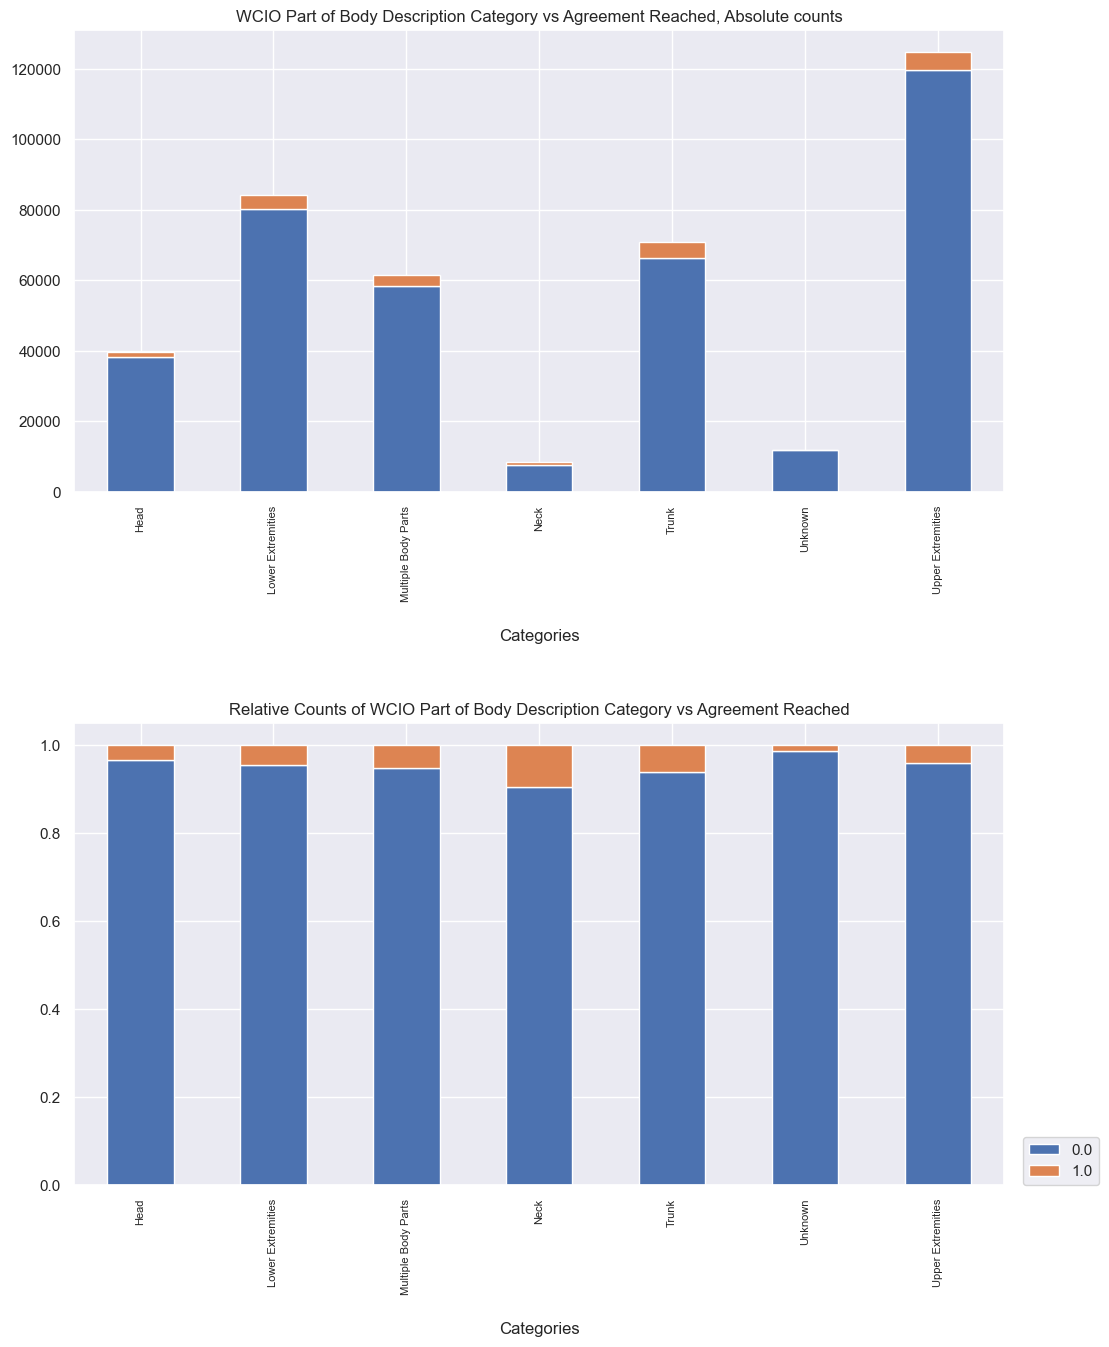

In [251]:
fig, axes = plt.subplots(2, 1, figsize=(12, 15))

cat1 = 'WCIO Part of Body Description Category'
cat2 = 'Agreement Reached'

#absolute counts
catpc_df = X_train.join(target_train).groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('WCIO Part of Body Description Category vs Agreement Reached, Absolute counts')
axes[0].legend([], frameon=False)  # Hide legend on right subplot
axes[0].set_xlabel("Categories", labelpad=20)
axes[0].tick_params(axis='x', labelrotation=90, labelsize=8)

#relative counts
catpc_df2 = X_train.join(target_train).groupby([cat1, cat2])[cat2].size() / X_train.join(target_train).groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of WCIO Part of Body Description Category vs Agreement Reached")
axes[1].legend(loc=(1.02, 0))  # Reposition legend on right subplot
axes[1].set_xlabel("Categories", labelpad=20)
axes[1].tick_params(axis='x', labelrotation=90, labelsize=8)

plt.subplots_adjust(hspace=0.5)
plt.show()

**`WCIO Nature of Injury`**

**Source:** https://www.dir.ca.gov/dwc/WCIS/Nature_Of_Injury.pdf

- Code 1: 01-04 07, 10, 13, 16, 19, 22, 25, 28, 30-32, 34, 36, 37, 40-43, 46, 47, 49, 52-55, 58,59 ----->Specific Injury
- Code 2: 60-80 ----->Occupational Disease or Cumulative Injury
- Code 3: 90-91 ----->Multiple Injuries


In [252]:
#Creating variables that divide the nature of injury code into the categories above 
n_code_1=[1, 2, 3, 4, 7, 10, 13, 16, 19, 22, 25, 28, 30, 31, 32, 34, 36, 37,38, 40, 41, 42, 43, 46, 47, 49, 52, 53, 54, 55, 58, 59]
n_code_2=list(range(60, 84))
n_code_3=[90,91]

def nature_categories(code):
    if pd.isna(code): #Again, setting the missing values as Unknown
        return "Unknown"
    elif code in n_code_1:
        return "Specific Injury"
    elif code in n_code_2:
        return "Occupational Disease or Cumulative Injury"
    elif code in n_code_3:
        return "Multiple Injuries"
    else:
        return "Unknown"

    Applying the fucntion on Training data

In [253]:
#Creating the new column of the categories using the WCIO Nature of Injury Code
X_train['WCIO Nature of Injury Description Category'] = X_train['WCIO Nature of Injury Code'].apply(nature_categories)


    Applying the function on Validation data

In [254]:
X_val['WCIO Nature of Injury Description Category'] = X_val['WCIO Nature of Injury Code'].apply(nature_categories)


Checking if the columns correspond to each other and if there was any error in the classification


In [255]:
nature_of_injury = X_train[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description', 'WCIO Nature of Injury Description Category']]

unique_nature_of_injury = nature_of_injury.drop_duplicates()

unique_nature_of_injury['WCIO Nature of Injury Code'] = unique_nature_of_injury['WCIO Nature of Injury Code'].astype(str)

unique_nature_of_injury = unique_nature_of_injury.sort_values(by='WCIO Nature of Injury Code', ascending=True)

unique_nature_of_injury.set_index('WCIO Nature of Injury Code', inplace=True)

unique_nature_of_injury



,WCIO Nature of Injury Description,WCIO Nature of Injury Description Category
WCIO Nature of Injury Code,,
1.0,NO PHYSICAL INJURY,Specific Injury
10.0,CONTUSION,Specific Injury
13.0,CRUSHING,Specific Injury
16.0,DISLOCATION,Specific Injury
19.0,ELECTRIC SHOCK,Specific Injury
2.0,AMPUTATION,Specific Injury
22.0,ENUCLEATION,Specific Injury
25.0,FOREIGN BODY,Specific Injury
28.0,FRACTURE,Specific Injury


**Visual Analysis**

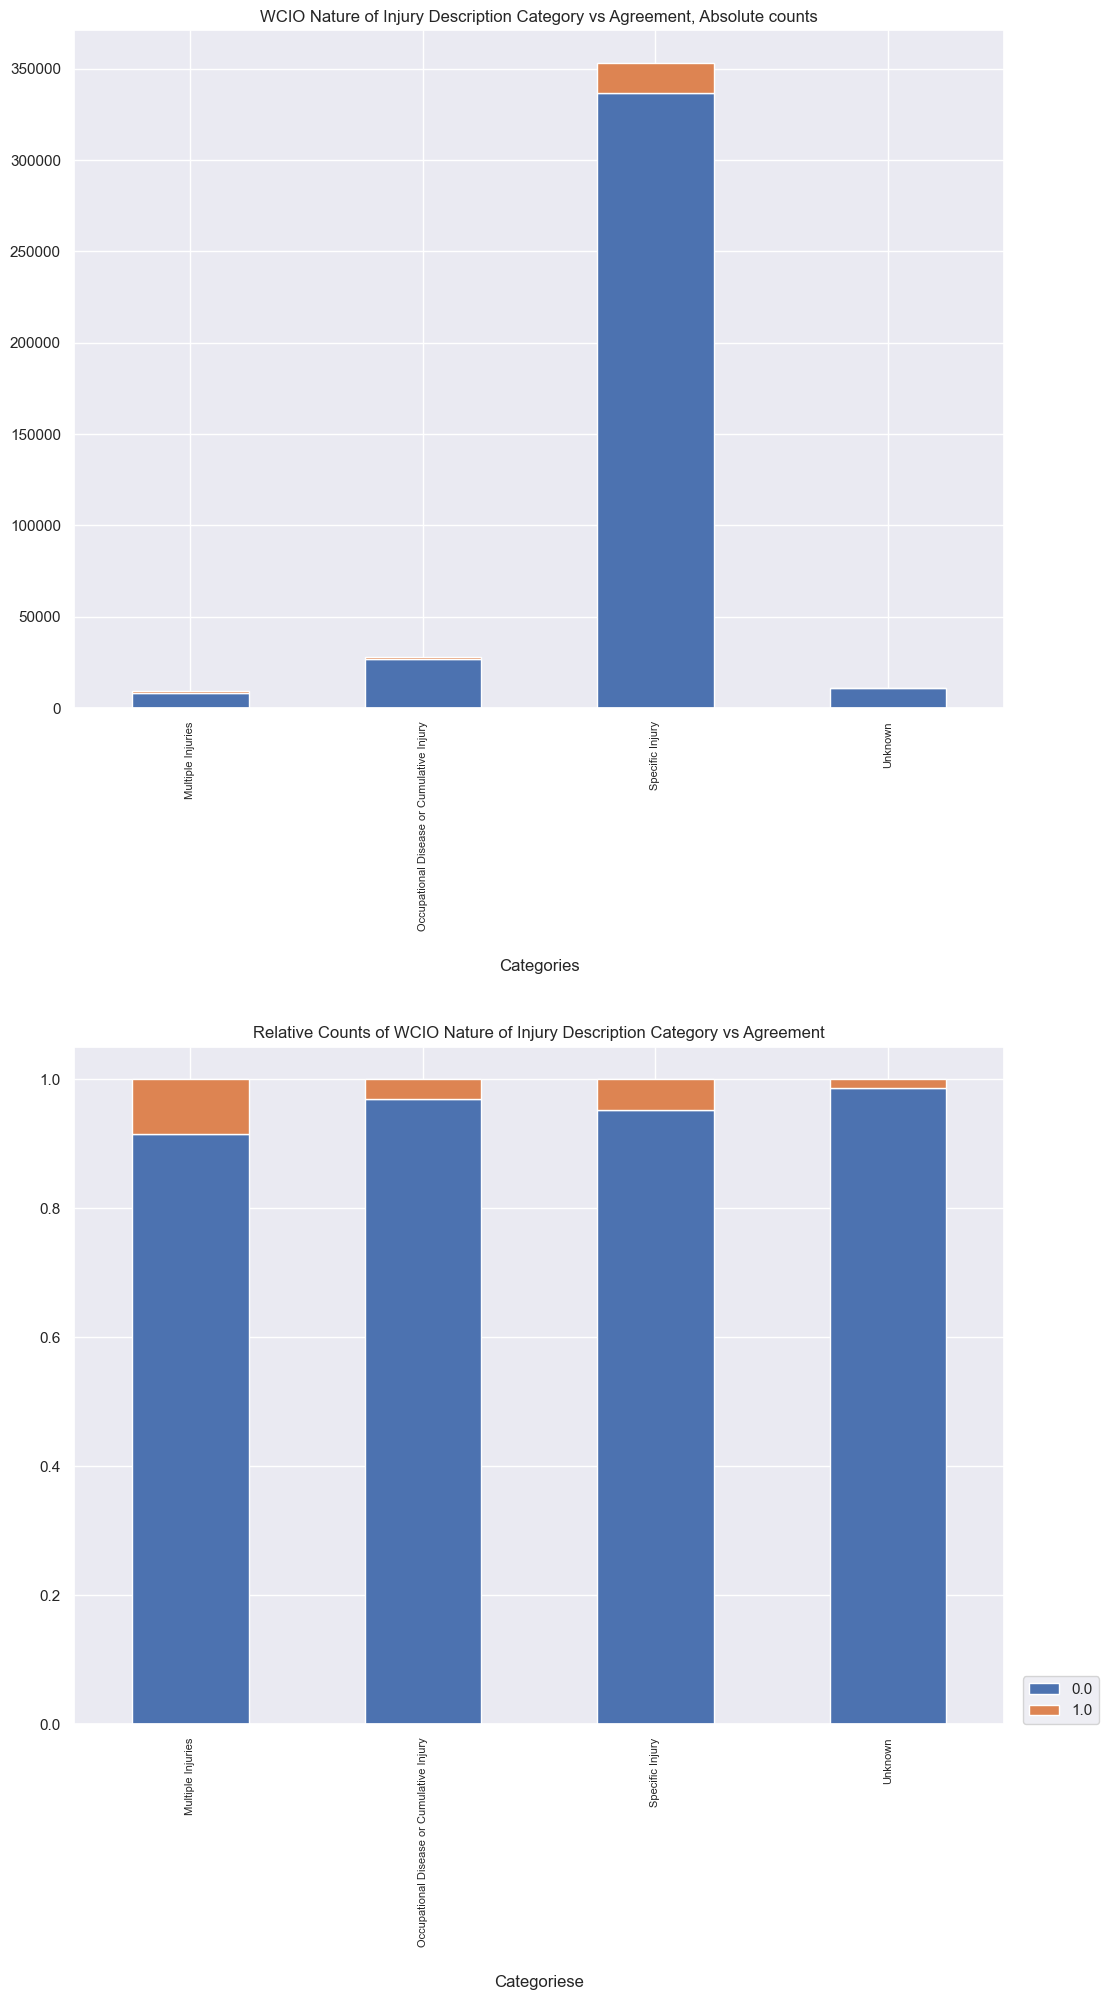

In [256]:
fig, axes = plt.subplots(2, 1, figsize=(12, 22))

cat1 = 'WCIO Nature of Injury Description Category'
cat2 = 'Agreement Reached'

#absolute counts
catpc_df = X_train.join(target_train).groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('WCIO Nature of Injury Description Category vs Agreement, Absolute counts')
axes[0].legend([], frameon=False)  
axes[0].set_xlabel("Categories", labelpad=20)
axes[0].tick_params(axis='x', labelrotation=90, labelsize=8)

#relative counts
catpc_df2 = X_train.join(target_train).groupby([cat1, cat2])[cat2].size() / X_train.join(target_train).groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of WCIO Nature of Injury Description Category vs Agreement")
axes[1].legend(loc=(1.02, 0))  # Reposition legend on right subplot
axes[1].set_xlabel("Categoriese", labelpad=20)
axes[1].tick_params(axis='x', labelrotation=90, labelsize=8)

plt.subplots_adjust(hspace=0.5)
plt.show()

**`WCIO Cause of Injury`**

**Source:** https://www.dir.ca.gov/dwc/WCIS/Cause_Of_Injury.pdf

- Code 1: 01-09, 11, 14, 84 ----->Burn or Scald - Heat or Cold Exposures - Contact With
 
- Code 2: 10, 12, 13, 20 ----->Caught In, Under or Between 

- Code 3: 15-19 ----->Cut, Puncture, Scrape Injured By

- Code 4: 25-33 ----> Fall, Slip or Trip Injury

- Code 5: 40, 41, 45-48, 50 -----> Motor Vehicle

- Code 6: 52-61, 97 ---->Strain or Injury By

- Code 7: 65-70 ---->Striking Against or Stepping On (Applies to cases in which the injury was produced by
the impact created by the person, rather than by the source.)

- Code 8: 74-81, 85, 86 ----> Struck or Injured By (Applies to cases in which the injury was produced by the impact created by the source of injury, rather than by the injured person.)

- Code 9: 94-95 ---->Rubbed or Abraded By

- Code 10: 82,83, 87-91, 93, 96, 98, 99 ---->Miscellaneous Causes



In [257]:
#Creating variables that divide the Cause of Injury into the categories above 
c_code_1 = list(range(1, 10)) + [11, 14, 84]
c_code_2 = [10, 12, 13, 20]
c_code_3 = list(range(15,20))
c_code_4 = list(range(25, 34))
c_code_5 = [40, 41] + list(range(45, 49)) + [50]
c_code_6 = list(range(52, 62)) + [97]
c_code_7 = list(range(65, 71))
c_code_8 = list(range(74, 82)) + [85, 86]
c_code_9 = [94, 95]
c_code_10 = [82,83] + list(range(87, 92)) + [93, 96, 98, 99]


def cause_categories(code):
    if pd.isna(code): 
        return "Unknown" #Setting the missing values as "Unknown"
    elif code in c_code_1:
        return "Burn or Scald - Heat or Cold Exposures - Contact With"
    elif code in c_code_2:
        return "Caught In, Under or Between "
    elif code in c_code_3:
        return "Cut, Puncture, Scrape Injured By"
    elif code in c_code_4:
        return "Fall, Slip or Trip Injury"
    elif code in c_code_5:
        return "Motor Vehicle"
    elif code in c_code_6:
        return "Strain or Injury By"
    elif code in c_code_7:
        return "Striking Against or Stepping On"
    elif code in c_code_8:
        return "Struck or Injured By"
    elif code in c_code_9:
        return "Rubbed or Abraded By"
    elif code in c_code_10:
        return "Miscellaneous Causes"
    else:
        return "Unknown"

    Applying the function on train data

In [258]:
X_train['WCIO Cause of Injury Description Category'] = X_train['WCIO Cause of Injury Code'].apply(cause_categories)


    Applying the fucntion on Validation data

In [259]:
X_val['WCIO Cause of Injury Description Category'] = X_val['WCIO Cause of Injury Code'].apply(cause_categories)


Checking if the columns correspond to each other and if there was any error in the classification


In [260]:
cause_of_injury = X_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description', 'WCIO Cause of Injury Description Category']]

unique_cause_of_injury = cause_of_injury.drop_duplicates()

unique_cause_of_injury['WCIO Cause of Injury Code'] = unique_cause_of_injury['WCIO Cause of Injury Code'].astype(str)

unique_cause_of_injury = unique_cause_of_injury.sort_values(by='WCIO Cause of Injury Code', ascending=True)

unique_cause_of_injury.set_index('WCIO Cause of Injury Code', inplace=True)

unique_cause_of_injury


,WCIO Cause of Injury Description,WCIO Cause of Injury Description Category
WCIO Cause of Injury Code,,
1.0,CHEMICALS,Burn or Scald - Heat or Cold Exposures - Conta...
10.0,MACHINE OR MACHINERY,"Caught In, Under or Between"
11.0,COLD OBJECTS OR SUBSTANCES,Burn or Scald - Heat or Cold Exposures - Conta...
12.0,OBJECT HANDLED,"Caught In, Under or Between"
13.0,"CAUGHT IN, UNDER OR BETWEEN, NOC","Caught In, Under or Between"
14.0,ABNORMAL AIR PRESSURE,Burn or Scald - Heat or Cold Exposures - Conta...
15.0,BROKEN GLASS,"Cut, Puncture, Scrape Injured By"
16.0,"HAND TOOL, UTENSIL; NOT POWERED","Cut, Puncture, Scrape Injured By"
17.0,OBJECT BEING LIFTED OR HANDLED,"Cut, Puncture, Scrape Injured By"


**Visual Analysis**

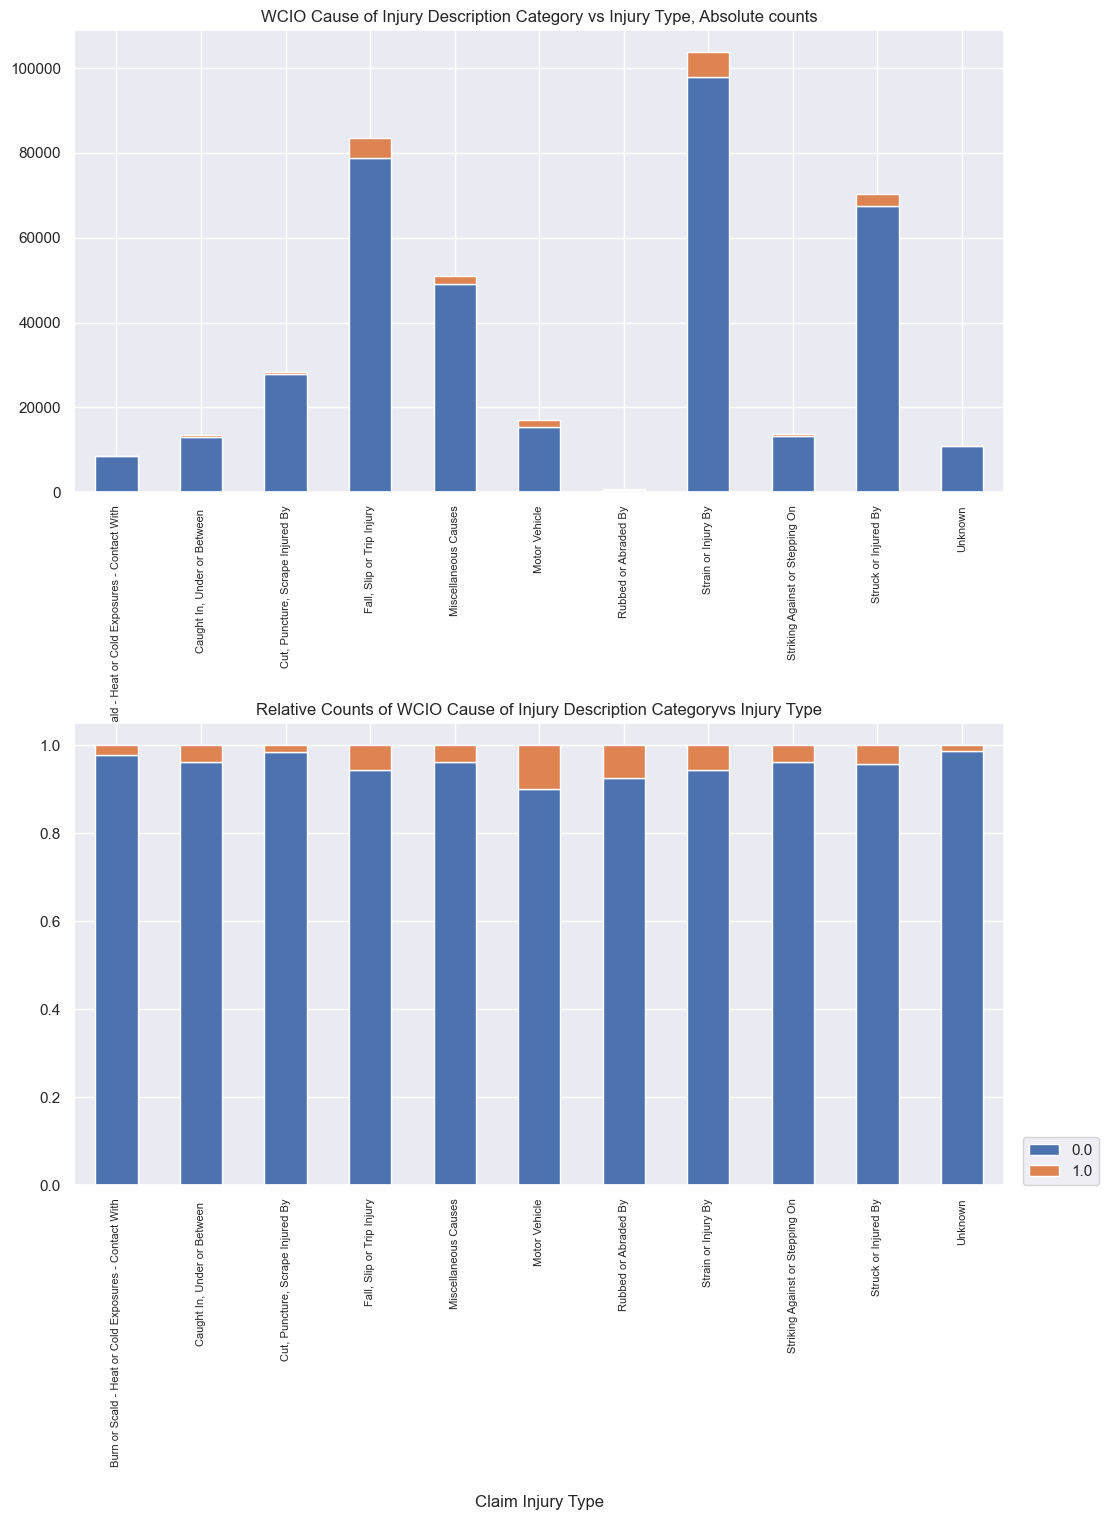

In [261]:
fig, axes = plt.subplots(2, 1, figsize=(12, 15))

cat1 = 'WCIO Cause of Injury Description Category'
cat2 = 'Agreement Reached'

#absolute counts
catpc_df = X_train.join(target_train).groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('WCIO Cause of Injury Description Category vs Injury Type, Absolute counts')
axes[0].legend([], frameon=False)  # Hide legend on right subplot
axes[0].set_xlabel("Claim Injury Type", labelpad=20)
axes[0].tick_params(axis='x', labelrotation=90, labelsize=8)

#relative counts
catpc_df2 = X_train.join(target_train).groupby([cat1, cat2])[cat2].size() / X_train.join(target_train).groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts of WCIO Cause of Injury Description Categoryvs Injury Type")
axes[1].legend(loc=(1.02, 0))  # Reposition legend on right subplot
axes[1].set_xlabel("Claim Injury Type", labelpad=20)
axes[1].tick_params(axis='x', labelrotation=90, labelsize=8)

plt.subplots_adjust(hspace=0.5)
plt.show()

### Days Between Assembly and Accident Date

- *Days Between* :  How many days between he date the claim was first assembled and the injury date

In [262]:
X_train['Diff_days_assembly_accident'] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days

    Val Data

In [263]:
X_val['Diff_days_assembly_accident'] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days

In [264]:
X_train['Diff_days_assembly_accident'].value_counts(dropna=False)

Diff_days_assembly_accident
6       25465
5       25078
4       24681
7       24145
3       22786
        ...  
2024        1
4541        1
2956        1
6135        1
3707        1
Name: count, Length: 4409, dtype: int64

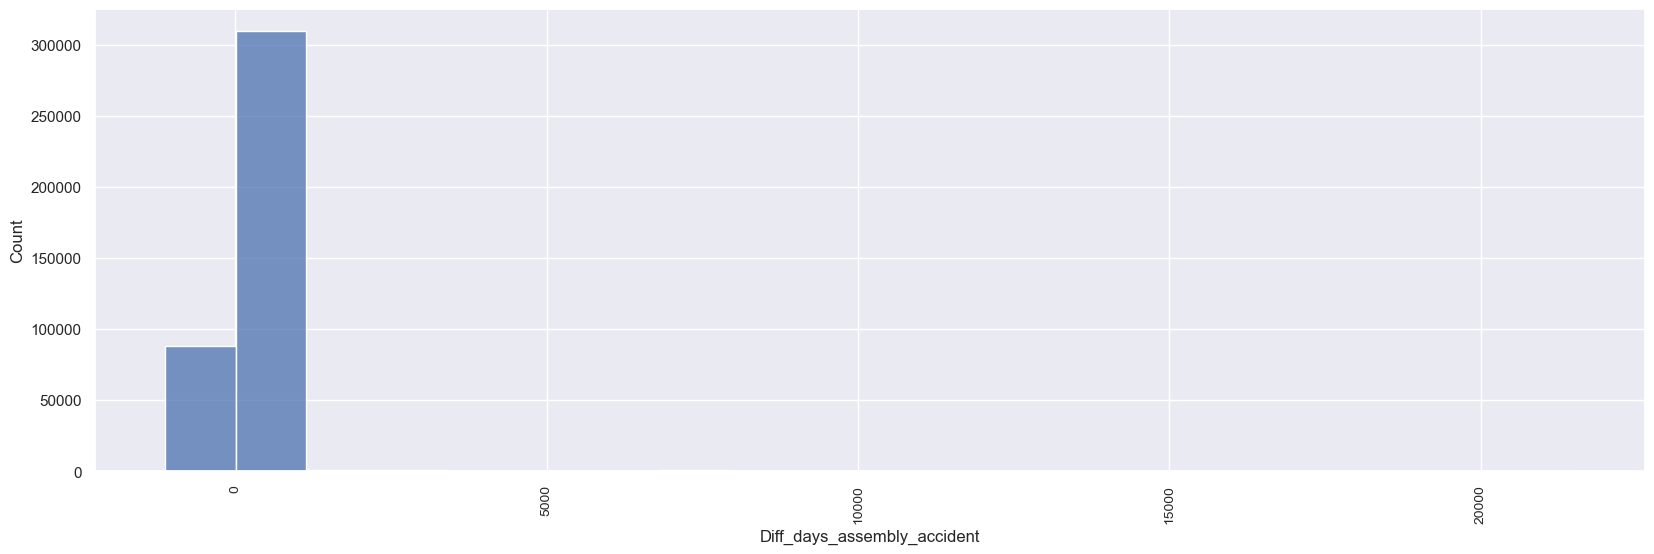

In [265]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(figsize=(20,6))  
sns.histplot(data=X_train, x="Diff_days_assembly_accident", bins=20)
plt.xticks(rotation=90, fontsize="small")
plt.show()

There are claims where the `Accident Date` happened after the `Assembly Date`, only 1030 rows

In [266]:
X_train[X_train['Diff_days_assembly_accident'] < 0]["Attorney/Representative"].value_counts(normalize=True)*100

Attorney/Representative
1    91.717172
0     8.282828
Name: proportion, dtype: Float64

* Maybe instead of differences, we could have a binary column asking if the assembly happened in 31 days? Since 78.33% is on that range?

In [267]:
len(X_train[X_train['Diff_days_assembly_accident'].isin(range(0,31))])/len(X_train)*100

78.97017957057585

### Average Weekly Wage Log

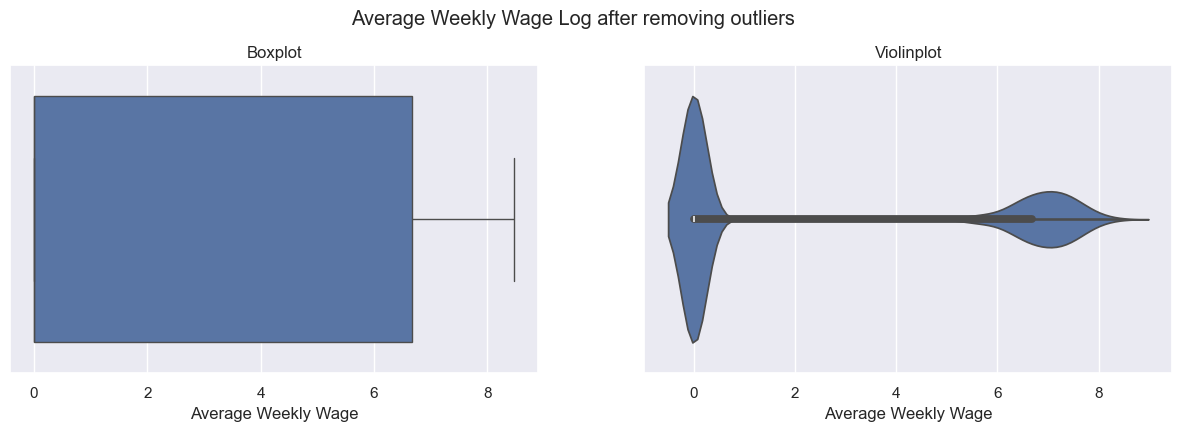

In [268]:
# Apply log transformation
log_wage = np.log1p(X_train["Average Weekly Wage"])
fig, axes = plt.subplots(1,2, figsize=(15, 4))

sns.boxplot(x=log_wage, ax=axes[0])
axes[0].set_title("Boxplot")


sns.violinplot(x=log_wage,ax=axes[1])
axes[1].set_title("Violinplot")

plt.suptitle("Average Weekly Wage Log after removing outliers", y=1.02)
plt.show()

In [269]:
X_train.loc[:,'Average Weekly Wage log'] = np.log1p(X_train['Average Weekly Wage'])

**Average Weekly Wage- Val Data**

In [270]:
X_val.loc[:,'Average Weekly Wage log'] = np.log1p(X_val['Average Weekly Wage'])

### Average Weekly Wage categories


Discretisizing the Average Weekly Wage feature into Wage categories.

In [271]:

def aww_discret(df, column, bins, labels, new_column_name):
    df[new_column_name] = pd.cut(
        df[column],
        bins=bins,
        labels=labels,
        include_lowest=True
    )
    return df

In [272]:
bins = [-0.1,0, 500, 1000, 2000, float('inf')]
labels = ["Zero",'Very Low', 'Low', 'Medium', 'High']

X_train = aww_discret(df=X_train, column='Average Weekly Wage', bins=bins, labels=labels, new_column_name='AWW_Category')

In [273]:
print(X_train['AWW_Category'].value_counts(dropna=False))

AWW_Category
Zero        254910
Medium       60975
Low          50280
High         17841
Very Low     17229
Name: count, dtype: int64


In [274]:
X_train['AWW_Category']= X_train['AWW_Category'].astype("object")

**Validation data**

In [275]:
X_val = aww_discret(df=X_val, column='Average Weekly Wage', bins=bins, labels=labels, new_column_name='AWW_Category')

In [276]:
X_val['AWW_Category']= X_val['AWW_Category'].astype("object")

### Age at Injury Categories

In [277]:
bins_age_injury = [0, 17, 24, 34, 44, 54, 64, float('inf')] 
labels_age_injury = ['< 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

X_train['age_injury_group'] = pd.cut(X_train['Age at Injury'], bins=bins_age_injury, labels=labels_age_injury, right=True)


In [278]:
X_train['age_injury_group'].value_counts()

age_injury_group
25-34    92615
45-54    87580
35-44    86771
55-64    75706
18-24    39432
65+      17619
< 18      1512
Name: count, dtype: int64

In [279]:
X_train['age_injury_group']= X_train['age_injury_group'].astype("object")

**Validation Data**

In [280]:
X_val['age_injury_group'] = pd.cut(X_val['Age at Injury'], bins=bins_age_injury, labels=labels_age_injury, right=True)


In [281]:
X_val['age_injury_group']= X_val['age_injury_group'].astype("object")

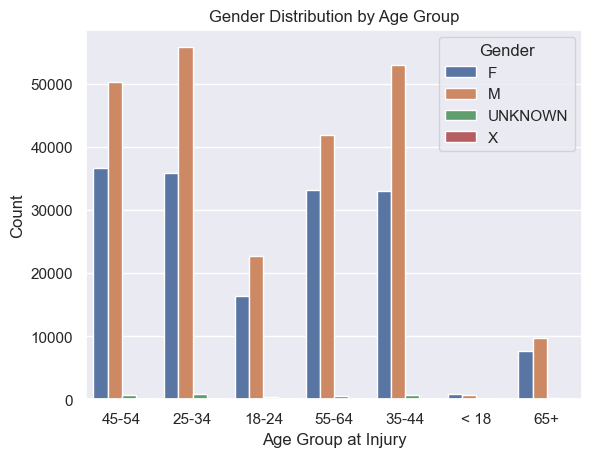

In [282]:
sns.countplot(data=X_train, x='age_injury_group', hue='Gender')
plt.title('Gender Distribution by Age Group')
plt.xlabel('Age Group at Injury')
plt.ylabel('Count')
plt.show()

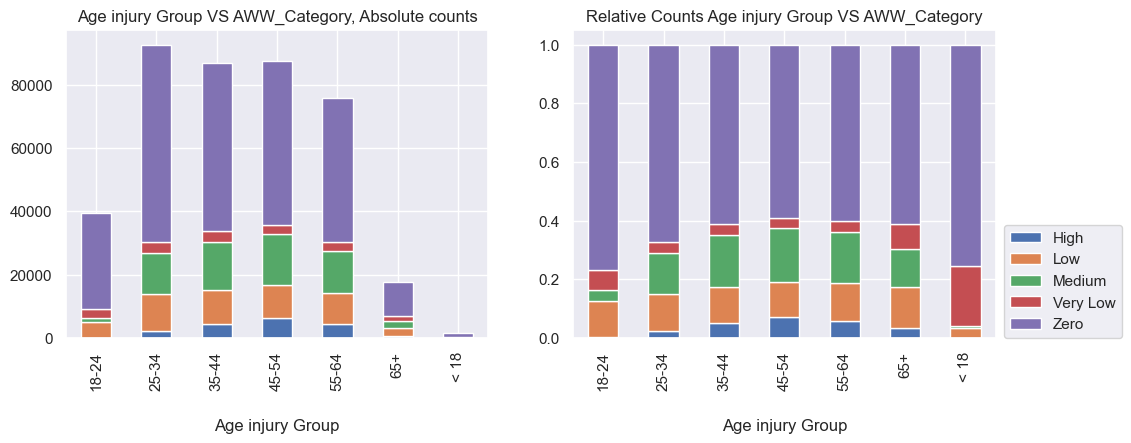

In [283]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

cat1 = 'age_injury_group'
cat2 = 'AWW_Category'
catpc_df = X_train.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].set_title('Age injury Group VS AWW_Category, Absolute counts')
axes[0].legend([], frameon=False) # hide legend on right subplot
axes[0].set_xlabel("Age injury Group",labelpad=20)

cat1 = 'age_injury_group'
cat2 = 'AWW_Category'

catpc_df2 = X_train.groupby([cat1, cat2])[cat2].size() / X_train.groupby([cat1])[cat2].size() 
catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title("Relative Counts Age injury Group VS AWW_Category")
axes[1].legend(loc=(1.02,0)) # reposition legend on right subplot
axes[1].set_xlabel("Age injury Group",labelpad=20)

plt.show()

### Zip Codes Aggregation

In [284]:
def zip_code_characteristic(zip_code):

    result = ""
    zip_code = str(zip_code).strip()

    if zip_code == "UNKNOWN":
        result= "UNKNOWN"
    
    elif zip_code.isalpha() :
        result= "ONLY_LETTERS"
        
    elif zip_code.isdigit():
        result= "ONLY_NUMBERS"
        
    elif '.' in zip_code and zip_code.replace('.', '').isdigit():
        result= "DECIMAL_POINT"
        
    elif zip_code.isalnum():
        result= "LETTERS_NUMBERS"

    elif any(c.isspace() for c in zip_code) and any(c.isalpha() for c in zip_code) and any(c.isdigit() for c in zip_code):
            result= "LETTERS_NUMBERS_WHITESPACE"
        
    else:
        result= "OTHER"
        
    return result
    

**`Classify the Zip Codes by their main charactheristic`**

In [285]:
X_train["Zip_Main_Characteristic"] = X_train["Zip Code"].apply(zip_code_characteristic)

In [286]:
X_train["Zip_Main_Characteristic"].value_counts(normalize=True)*100

Zip_Main_Characteristic
ONLY_NUMBERS                  92.339402
UNKNOWN                        4.968908
DECIMAL_POINT                  2.635363
LETTERS_NUMBERS                0.043615
LETTERS_NUMBERS_WHITESPACE     0.009720
ONLY_LETTERS                   0.002243
OTHER                          0.000748
Name: proportion, dtype: float64

**`Classify the Zip Codes of the test data by their main charactheristic`**

In [287]:
X_val["Zip_Main_Characteristic"] = X_val["Zip Code"].apply(zip_code_characteristic)

**`Classify the numeric Zip Codes by their first digit`**

In [288]:
def zip_classification_for_aggregation(zip_code, characteristic):

    result = ""
    if characteristic == "ONLY_NUMBERS":
        first_char = zip_code[0] 
        if first_char.isdigit():  
            result = first_char  
    elif characteristic == "UNKNOWN":
        result= "UNKNOWN" 
    else:
        result= "NON_NUMERIC"  
    return result

In [289]:
X_train['Classification_Zip_Code'] = X_train.apply(lambda row: zip_classification_for_aggregation(row['Zip Code'], row['Zip_Main_Characteristic']), axis=1)


In [290]:
X_train['Classification_Zip_Code'].value_counts(normalize=True)*100

Classification_Zip_Code
1              87.782222
UNKNOWN         4.968908
0               3.122360
NON_NUMERIC     2.691689
3               0.604882
2               0.343190
9               0.128104
7               0.125114
4               0.087231
8               0.075766
6               0.039877
5               0.030655
Name: proportion, dtype: float64

**`Classify the Numeric Zip Codes in the validation data by their main charactheristic`**

In [291]:
X_val['Classification_Zip_Code'] = X_val.apply(lambda row: zip_classification_for_aggregation(row['Zip Code'], row['Zip_Main_Characteristic']), axis=1)

<a class="anchor" id="4">

# Encoding
    
</a>

**`Decided what columns to drop and not use on encoding`**

* todos os codes

In [292]:
## drop all columns that end in " Code"
code_columns_to_drop = [col for col in X_train.columns if col.endswith(' Code')]

## drop columns that we decided to not use for encoding
other_columns_to_drop = ['Accident Date', "C-2 Date", "Assembly Date"]

all_columns_to_drop = code_columns_to_drop+other_columns_to_drop

In [293]:
X_train.drop(columns=all_columns_to_drop, inplace=True)

**`Make a copy before doing the encoding`**

In [294]:
X_train_encoding = X_train.copy()

In [295]:
X_val_encoding= X_val.copy()

In [296]:
target_train_copy = target_train.copy()

In [297]:
target_val_copy = target_val.copy()

In [298]:
X_train_encoding.select_dtypes(include=['object']).columns

Index(['Alternative Dispute Resolution', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'District Name', 'Gender',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Description',
       'WCIO Part of Body Description Category',
       'WCIO Nature of Injury Description Category',
       'WCIO Cause of Injury Description Category', 'AWW_Category',
       'age_injury_group', 'Zip_Main_Characteristic',
       'Classification_Zip_Code'],
      dtype='object')

In [299]:
X_train_encoding.select_dtypes(exclude=['object']).columns

Index(['Age at Injury', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'has_c3_date', 'COVID-19 Indicator',
       'has_first_hearing_date', 'has_ime', 'Number of Dependents',
       'Diff_days_assembly_accident', 'Average Weekly Wage log'],
      dtype='object')

In [300]:
X_train_encoding["has_c3_date"].value_counts()

has_c3_date
0    270363
1    130872
Name: count, dtype: int64

**`these are the features that we are using for now to the frequency enconding`**

In [301]:
freq_features = ['Carrier Name',
                'County of Injury',
                "District Name",
                'Industry Code Description',
                "WCIO Part Of Body Description",
                "WCIO Nature of Injury Description",
                "WCIO Cause of Injury Description",
                "AWW_Category",
                "age_injury_group",
                "Classification_Zip_Code"]

**`these are the features that we are using for now to the one hot enconding`**

Explicar o porquê de não fazermos encoding das outras!!

For One Hot Encoding, we only considered for the categorical variables that have until 5 unique values.

In [302]:
# ohc_features = ['Gender',
# 'Medical Fee Region',
# "Carrier Type", 
# 'Accident_Quarter',
# 'Assembly_Quarter']


In [303]:
ohc_features_v2 = ['Alternative Dispute Resolution',
                   "Carrier Type", 
                   'Gender',
                    'Medical Fee Region',
                    'WCIO Part of Body Description Category',
                    'WCIO Nature of Injury Description Category',
                    'WCIO Cause of Injury Description Category',
                    'AWW_Category', 
                    'age_injury_group',
                   ]

In [304]:
def frequency_encoder(df, cat_cols):

    df_encoded = df.copy()
    for col in cat_cols:
        frequencies = df_encoded[col].value_counts(normalize=True)
        new_col_name = f"{col}_Frqc"
        df_encoded[new_col_name] = df_encoded[col].map(frequencies)
    return df_encoded


In [305]:

# # Perform Frequency Encoding
# X_freq_encoded = frequency_encoder(X_train_encoding, freq_features)


# # Perform One-Hot Encoding
# enc = OneHotEncoder(sparse_output=False, drop='first')
# X_ohc_encoded = enc.fit_transform(X_train_encoding[ohc_features])

# # Convert one-hot encoding to DataFrame
# encoded_columns = enc.get_feature_names_out(ohc_features)
# X_ohc_encoded_df = pd.DataFrame(X_ohc_encoded, columns=encoded_columns, index=X_train_encoding.index)


# # Drop original frequency and OHC features from X
# X_train_encoding = X_train_encoding.drop(columns=freq_features + ohc_features, errors='ignore')

# # Find the frequency-encoded columns in the DataFrame
# freq_encoded_cols = [col for col in X_freq_encoded.columns if col.endswith('_Frqc')]


# # Concatenate back to the DataFrame
# X_train_encoding = pd.concat([X_train_encoding, X_freq_encoded[freq_encoded_cols], X_ohc_encoded_df], axis=1)

# # Encode the target variable
# enc2 = LabelEncoder()
# target_train_encoding = enc2.fit_transform(target_train_copy)
# df_target_train_encoding = pd.DataFrame(target_train_encoding, index=target_train_copy.index)
# df_target_train_encoding.rename(columns={0: 'Claim Injury Type',}, inplace=True)

**`2nd version`**

In [306]:
# Perform Frequency Encoding
X_freq_encoded = frequency_encoder(X_train_encoding, freq_features)


# Perform One-Hot Encoding
enc = OneHotEncoder(sparse_output=False, drop=None)
X_ohc_encoded = enc.fit_transform(X_train_encoding[ohc_features_v2])

# Convert one-hot encoding to DataFrame
encoded_columns = enc.get_feature_names_out(ohc_features_v2)
X_ohc_encoded_df = pd.DataFrame(X_ohc_encoded, columns=encoded_columns, index=X_train_encoding.index)


# Drop original frequency and OHC features from X
X_train_encoding = X_train_encoding.drop(columns=freq_features + ohc_features_v2, errors='ignore')

# Find the frequency-encoded columns in the DataFrame
freq_encoded_cols = [col for col in X_freq_encoded.columns if col.endswith('_Frqc')]


# Concatenate back to the DataFrame
X_train_encoding = pd.concat([X_train_encoding, X_freq_encoded[freq_encoded_cols], X_ohc_encoded_df], axis=1)


df_target_train_encoding = target_train_copy.astype(int)
df_target_train_encoding.rename(columns={0: 'Agreement Reached',}, inplace=True)

In [307]:
target_train

,Agreement Reached
Claim Identifier,
5448641,0.0
5562355,0.0
5718324,0.0
5471554,0.0
5443991,0.0
...,...
5986134,0.0
5733992,0.0
6137629,0.0


In [308]:
df_target_train_encoding

,Agreement Reached
Claim Identifier,
5448641,0
5562355,0
5718324,0
5471554,0
5443991,0
...,...
5986134,0
5733992,0
6137629,0


**`Enconding for Validation Data`**

In [309]:
# # Perform Frequency Encoding for validation data
# X_val_freq_encoded = frequency_encoder(X_val_encoding, freq_features)

# # Perform One-Hot Encoding for validation data
# X_val_ohc_encoded = enc.transform(X_val_encoding[ohc_features])  

# # Convert one-hot encoding to DataFrame
# X_val_ohc_encoded_df = pd.DataFrame(X_val_ohc_encoded, columns=encoded_columns, index=X_val_encoding.index)

# # Drop original frequency and OHC features from X_val_enconding
# X_val_encoding = X_val_encoding.drop(columns=freq_features + ohc_features, errors='ignore')

# # Find the frequency-encoded columns in the DataFrame
# freq_encoded_cols = [col for col in X_val_freq_encoded.columns if col.endswith('_Frqc')]

# # Concatenate back to the DataFrame
# X_val_encoding = pd.concat([X_val_encoding, X_val_freq_encoded[freq_encoded_cols], X_val_ohc_encoded_df], axis=1)


# target_val_encoding = enc2.transform(target_val_copy)
# df_target_val_encoding = pd.DataFrame(target_val_encoding, index=target_val_copy.index)
# df_target_val_encoding.rename(columns={0: 'Claim Injury Type',}, inplace=True)

**`2nd version`**

In [310]:
# Perform Frequency Encoding for validation data
X_val_freq_encoded = frequency_encoder(X_val_encoding, freq_features)

# Perform One-Hot Encoding for validation data
X_val_ohc_encoded = enc.transform(X_val_encoding[ohc_features_v2])  

# Convert one-hot encoding to DataFrame
X_val_ohc_encoded_df = pd.DataFrame(X_val_ohc_encoded, columns=encoded_columns, index=X_val_encoding.index)

# Drop original frequency and OHC features from X_val_enconding
X_val_encoding = X_val_encoding.drop(columns=freq_features + ohc_features_v2, errors='ignore')

# Find the frequency-encoded columns in the DataFrame
freq_encoded_cols = [col for col in X_val_freq_encoded.columns if col.endswith('_Frqc')]

# Concatenate back to the DataFrame
X_val_encoding = pd.concat([X_val_encoding, X_val_freq_encoded[freq_encoded_cols], X_val_ohc_encoded_df], axis=1)



df_target_val_encoding = target_train_copy.astype(int)
df_target_val_encoding.rename(columns={0: 'Agreement Reached',}, inplace=True)

In [311]:
target_val

,Agreement Reached
Claim Identifier,
5988686,0.0
5800978,0.0
5781530,0.0
5939433,0.0
5774722,0.0
...,...
6124492,0.0
5485310,0.0
5774768,0.0


In [312]:
df_target_val_encoding

,Agreement Reached
Claim Identifier,
5448641,0
5562355,0
5718324,0
5471554,0
5443991,0
...,...
5986134,0
5733992,0
6137629,0


<a class="anchor" id="5">

# Scaling
    
</a>

**`Get two dataframes already encoded, one for MinMaxScaler, the other for StandardScalerr`**

In [313]:
X_train_encoding["has_c3_date"].value_counts()

has_c3_date
0    270363
1    130872
Name: count, dtype: int64

In [314]:
X_train_min_max = X_train_encoding.copy()

In [315]:
X_train_std_scaler = X_train_encoding.copy()

In [316]:
metric_feats_v2 = ['Age at Injury',
                    'Average Weekly Wage',
                    'Birth Year', 
                    'Number of Dependents',
                    'Diff_days_assembly_accident', 
                    'Average Weekly Wage log',
                    'Carrier Name_Frqc', 
                    'County of Injury_Frqc',
                    'District Name_Frqc',
                    'Industry Code Description_Frqc',
                    'WCIO Part Of Body Description_Frqc',
                    'WCIO Nature of Injury Description_Frqc',
                    'WCIO Cause of Injury Description_Frqc', 
                    'AWW_Category_Frqc',
                    'age_injury_group_Frqc', 
                    'Classification_Zip_Code_Frqc']

In [317]:
categ_feats_v2 = ['Attorney/Representative',
                    'has_c3_date',
                    'COVID-19 Indicator',
                    'has_first_hearing_date', 
                    'has_ime', 
                    'Alternative Dispute Resolution_N',
       'Alternative Dispute Resolution_UNKNOWN',
       'Alternative Dispute Resolution_Y', 'Carrier Type_1A. PRIVATE',
       'Carrier Type_2A. SIF', 'Carrier Type_3A. SELF PUBLIC',
       'Carrier Type_4A. SELF PRIVATE',
       'Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)',
       'Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS',
       'Carrier Type_5D. SPECIAL FUND - UNKNOWN', 'Carrier Type_UNKNOWN',
       'Gender_F', 'Gender_M', 'Gender_UNKNOWN', 'Gender_X',
       'Medical Fee Region_I', 'Medical Fee Region_II',
       'Medical Fee Region_III', 'Medical Fee Region_IV',
       'Medical Fee Region_UNKNOWN',
       'WCIO Part of Body Description Category_Head',
       'WCIO Part of Body Description Category_Lower Extremities',
       'WCIO Part of Body Description Category_Multiple Body Parts',
       'WCIO Part of Body Description Category_Neck',
       'WCIO Part of Body Description Category_Trunk',
       'WCIO Part of Body Description Category_Unknown',
       'WCIO Part of Body Description Category_Upper Extremities',
       'WCIO Nature of Injury Description Category_Multiple Injuries',
       'WCIO Nature of Injury Description Category_Occupational Disease or Cumulative Injury',
       'WCIO Nature of Injury Description Category_Specific Injury',
       'WCIO Nature of Injury Description Category_Unknown',
       'WCIO Cause of Injury Description Category_Burn or Scald - Heat or Cold Exposures - Contact With',
       'WCIO Cause of Injury Description Category_Caught In, Under or Between ',
       'WCIO Cause of Injury Description Category_Cut, Puncture, Scrape Injured By',
       'WCIO Cause of Injury Description Category_Fall, Slip or Trip Injury',
       'WCIO Cause of Injury Description Category_Miscellaneous Causes',
       'WCIO Cause of Injury Description Category_Motor Vehicle',
       'WCIO Cause of Injury Description Category_Rubbed or Abraded By',
       'WCIO Cause of Injury Description Category_Strain or Injury By',
       'WCIO Cause of Injury Description Category_Striking Against or Stepping On',
       'WCIO Cause of Injury Description Category_Struck or Injured By',
       'WCIO Cause of Injury Description Category_Unknown',
       'AWW_Category_High', 'AWW_Category_Low', 'AWW_Category_Medium',
       'AWW_Category_Very Low', 'AWW_Category_Zero', 'age_injury_group_18-24',
       'age_injury_group_25-34', 'age_injury_group_35-44',
       'age_injury_group_45-54', 'age_injury_group_55-64',
       'age_injury_group_65+', 'age_injury_group_< 18']

**`Get a dataframe with metric/cat feats for the Min-Max scaler`**

In [318]:
X_train_num_min_max = X_train_min_max[metric_feats_v2]
X_train_cat_min_max = X_train_min_max[categ_feats_v2]

In [319]:
X_train_cat_min_max["has_c3_date"].value_counts()

has_c3_date
0    270363
1    130872
Name: count, dtype: int64

**`Get a dataframe with metric/cat feats for the Standard Scalling`**

In [320]:
X_train_num_std_scaler = X_train_std_scaler[metric_feats_v2]
X_train_std_scaler = X_train_std_scaler[categ_feats_v2]

## Try with MinMaxScaler

Data scaling on the training data

In [321]:
scaler = MinMaxScaler()

#Fitting to training data
scaler.fit(X_train_num_min_max)

#Transforming the data
X_train_num_scaled_min_max = scaler.transform(X_train_num_min_max) # this will return an array

In [322]:
# Converting the array to a pandas dataframe
X_train_num_scaled_min_max = pd.DataFrame(X_train_num_scaled_min_max, columns = X_train_num_min_max.columns).set_index(X_train_encoding.index)
X_train_num_scaled_min_max

,Age at Injury,Average Weekly Wage,Birth Year,Number of Dependents,Diff_days_assembly_accident,Average Weekly Wage log,Carrier Name_Frqc,County of Injury_Frqc,District Name_Frqc,Industry Code Description_Frqc,WCIO Part Of Body Description_Frqc,WCIO Nature of Injury Description_Frqc,WCIO Cause of Injury Description_Frqc,AWW_Category_Frqc,age_injury_group_Frqc,Classification_Zip_Code_Frqc
Claim Identifier,,,,,,,,,,,,,,,,
5448641,0.563218,0.149292,0.584746,0.000000,0.049845,0.775773,1.000000,0.888346,1.000000,1.000000,0.151247,0.720877,0.796055,0.139056,0.944733,1.000000
5562355,0.275862,0.250870,0.805085,1.000000,0.050199,0.836938,0.008067,0.509848,0.155213,1.000000,0.147361,0.082936,0.796055,0.184053,1.000000,1.000000
5718324,0.252874,0.000000,0.822034,0.000000,0.050022,0.000000,0.157041,0.398123,0.136635,0.537894,0.239576,0.306290,0.069321,1.000000,0.416232,1.000000
5471554,0.356322,0.000000,0.737288,0.833333,0.051966,0.000000,0.005283,0.657846,1.000000,0.471040,0.222626,1.000000,0.712012,1.000000,1.000000,1.000000
5443991,0.678161,0.000000,0.500000,0.333333,0.051304,0.000000,0.157041,0.231595,1.000000,0.471040,0.730522,1.000000,0.268695,1.000000,0.814397,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5986134,0.459770,0.000000,0.669492,1.000000,0.070614,0.000000,0.014832,0.004597,0.136635,0.077645,0.147361,0.720877,0.627047,1.000000,0.935853,1.000000
5733992,0.310345,0.178986,0.788136,0.833333,0.051436,0.797146,1.000000,1.000000,0.210878,0.385791,1.000000,1.000000,0.162996,0.139056,1.000000,0.030325
6137629,0.517241,0.000000,0.635593,0.666667,0.050376,0.000000,1.000000,0.285255,0.306600,1.000000,0.378476,0.720877,0.796055,1.000000,0.944733,1.000000


Data scaling on the validation data

## Try with Standard Scaling

In [323]:
ss_scaler = StandardScaler()

#data scaling on training data
ss_scaler.fit(X_train_num_std_scaler) 
X_train_num_scaled_std_scaler = ss_scaler.transform(X_train_num_std_scaler) 

X_train_num_scaled_std_scaler = pd.DataFrame(X_train_num_scaled_std_scaler, columns=X_train_num_std_scaler.columns).set_index(X_train.index)

In [324]:

X_train_num_scaled_std_scaler


,Age at Injury,Average Weekly Wage,Birth Year,Number of Dependents,Diff_days_assembly_accident,Average Weekly Wage log,Carrier Name_Frqc,County of Injury_Frqc,District Name_Frqc,Industry Code Description_Frqc,WCIO Part Of Body Description_Frqc,WCIO Nature of Injury Description_Frqc,WCIO Cause of Injury Description_Frqc,AWW_Category_Frqc,age_injury_group_Frqc,Classification_Zip_Code_Frqc
Claim Identifier,,,,,,,,,,,,,,,,
5448641,0.546229,0.384996,-0.644410,-1.501273,-0.134826,1.206903,2.022520,1.052691,1.045664,1.461042,-1.107714,0.575069,1.258990,-1.279221,0.460375,0.373006
5562355,-1.284081,1.064686,1.244974,1.494782,-0.121397,1.361437,-0.605728,-0.036120,-1.042977,1.461042,-1.120240,-1.149311,1.258990,-1.172974,0.707457,0.373006
5718324,-1.430505,-0.613963,1.390311,-1.501273,-0.128111,-0.753088,-0.211002,-0.357515,-1.088910,0.029227,-0.822979,-0.545576,-1.344660,0.753638,-1.902389,0.373006
5471554,-0.771594,-0.613963,0.663625,0.995439,-0.054252,-0.753088,-0.613103,0.389620,1.045664,-0.177918,-0.877616,1.329549,0.957889,0.753638,0.707457,0.373006
5443991,1.278353,-0.613963,-1.371096,-0.502588,-0.079431,-0.753088,-0.211002,-0.836559,1.045664,-0.177918,0.759634,1.329549,-0.630368,0.753638,-0.122317,0.373006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5986134,-0.112682,-0.613963,0.082276,1.494782,0.654123,-0.753088,-0.587803,-1.489558,-1.088910,-1.396834,-1.120240,0.575069,0.653490,0.753638,0.420675,0.373006
5733992,-1.064443,0.583686,1.099636,0.995439,-0.074396,1.260903,2.022520,1.373880,-0.905351,-0.442058,1.628321,1.329549,-1.009053,-1.279221,0.707457,-2.707617
6137629,0.253380,-0.613963,-0.208399,0.496097,-0.114682,-0.753088,2.022520,-0.682199,-0.668689,1.461042,-0.375220,0.575069,1.258990,0.753638,0.460375,0.373006


## Compare MinMaxScaler VS StandardScaler VS Data (?)

In [325]:
metric_feats

['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'Number of Dependents']

#### Boxplots

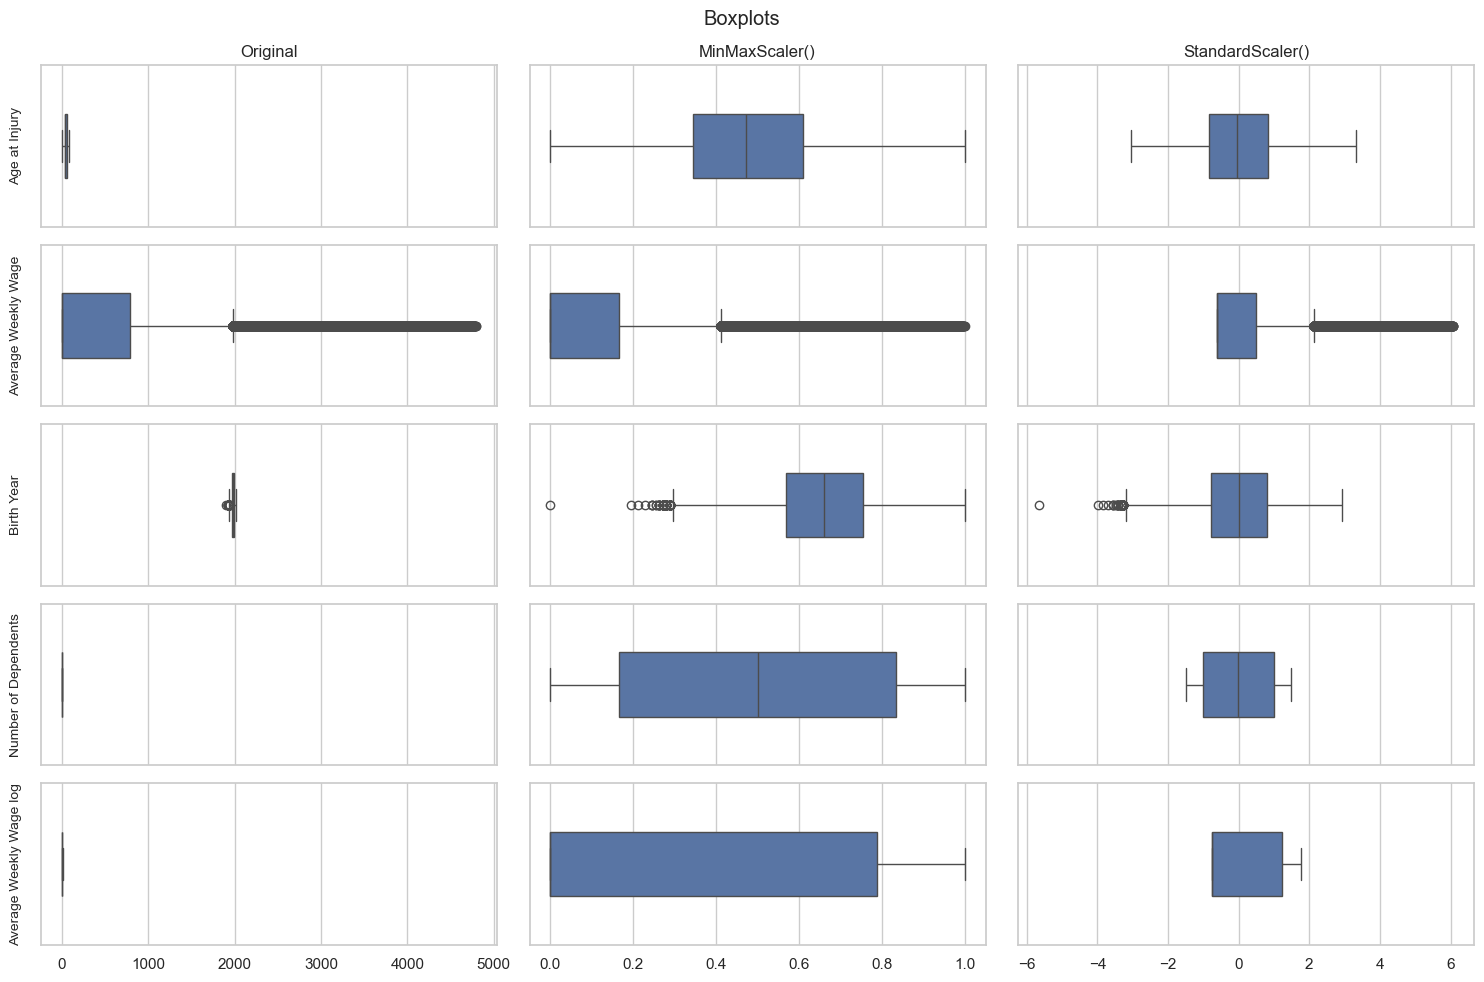

In [326]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(5,3, figsize=(15,10), tight_layout=True, sharex='col', sharey='row')

bp_feat_age = 'Age at Injury'

sns.boxplot(X_train, x=bp_feat_age, ax=axes[0][0], width=.4)
axes[0][0].set_title('Original')
axes[0][0].set_ylabel(bp_feat_age, fontsize="small")

sns.boxplot(X_train_num_scaled_min_max, x=bp_feat_age, ax=axes[0][1], width=.4)
axes[0][1].set_title('MinMaxScaler()')

sns.boxplot(X_train_num_scaled_std_scaler, x=bp_feat_age, ax=axes[0][2], width=.4)
axes[0][2].set_title('StandardScaler()')


bp_feat_aww = 'Average Weekly Wage'

sns.boxplot(X_train, x=bp_feat_aww, ax=axes[1][0], width=.4)
axes[1][0].set_ylabel(bp_feat_aww, fontsize="small")

sns.boxplot(X_train_num_scaled_min_max, x=bp_feat_aww, ax=axes[1][1], width=.4)

sns.boxplot(X_train_num_scaled_std_scaler, x=bp_feat_aww, ax=axes[1][2], width=.4)


bp_feat_by = 'Birth Year'

sns.boxplot(X_train, x=bp_feat_by, ax=axes[2][0], width=.4)
axes[2][0].set_ylabel(bp_feat_by, fontsize="small")

sns.boxplot(X_train_num_scaled_min_max, x=bp_feat_by, ax=axes[2][1], width=.4)

sns.boxplot(X_train_num_scaled_std_scaler, x=bp_feat_by, ax=axes[2][2], width=.4)


bp_feat_nd = 'Number of Dependents'

sns.boxplot(X_train, x=bp_feat_nd, ax=axes[3][0], width=.4)
axes[3][0].set_ylabel(bp_feat_nd, fontsize="small")

sns.boxplot(X_train_num_scaled_min_max, x=bp_feat_nd, ax=axes[3][1], width=.4)

sns.boxplot(X_train_num_scaled_std_scaler, x=bp_feat_nd, ax=axes[3][2], width=.4)

bp_feat_aww_log = 'Average Weekly Wage log'
sns.boxplot(X_train, x=bp_feat_aww_log, ax=axes[4][0], width=.4)
axes[4][0].set_ylabel(bp_feat_aww_log, fontsize="small")

sns.boxplot(X_train_num_scaled_min_max, x=bp_feat_aww_log, ax=axes[4][1], width=.4)

sns.boxplot(X_train_num_scaled_std_scaler, x=bp_feat_aww_log, ax=axes[4][2], width=.4)



for i in range(5):  # Loop over the rows
    for j in range(3):  # Loop over the columns
        axes[i][j].set_xlabel('')  # Remove the x-axis label

fig.suptitle('Boxplots')
plt.show()

In [327]:
X_train_cat_min_max["has_c3_date"]

Claim Identifier
5448641    0
5562355    0
5718324    0
5471554    0
5443991    0
          ..
5986134    0
5733992    1
6137629    0
5542943    0
6143465    0
Name: has_c3_date, Length: 401235, dtype: int32

**`Apply the MinMax Scaler for the validation dataset`**

In [328]:
#Repeating for Validation

X_val_num = X_val_encoding[metric_feats_v2]
X_val_cat = X_val_encoding[categ_feats_v2]

In [329]:
X_val_num_scaled_min_max = scaler.transform(X_val_num) 
X_val_num_scaled_min_max = pd.DataFrame(X_val_num_scaled_min_max, columns = X_val_num.columns).set_index(X_val_encoding.index) 

In [330]:
X_val_cat["has_c3_date"].value_counts()

has_c3_date
0    116066
1     56142
Name: count, dtype: int64

<a class="anchor" id="6">

# Feature Selection
    
</a>

In [331]:
df_target_train = df_target_train_encoding.copy()

In [332]:
y_train = df_target_train['Agreement Reached'].to_numpy()

In [333]:
X_train_cat_min_max["has_c3_date"].value_counts()

has_c3_date
0    270363
1    130872
Name: count, dtype: int64

In [334]:
X_train_num_ar = X_train_num_scaled_min_max.copy()

In [335]:
X_train_cat_ar = X_train_cat_min_max.copy()

In [336]:
X_train_all_ar =  pd.concat([X_train_num_ar, X_train_cat_ar], axis=1)

In [337]:
df_target_val = target_val.copy()

In [338]:
y_val = target_val.to_numpy()

In [339]:
X_val_num_ar = X_val_num_scaled_min_max.copy()

In [340]:
X_val_cat_ar = X_val_cat.copy()

In [341]:
X_val_all_ar = pd.concat([X_val_num_ar, X_val_cat_ar], axis=1)

## Filter Methods

### Univariate Variables

In [342]:
X_train_num_ar.var()

Age at Injury                             0.024649
Average Weekly Wage                       0.022335
Birth Year                                0.013600
Number of Dependents                      0.111404
Diff_days_assembly_accident               0.000693
Average Weekly Wage log                   0.156661
Carrier Name_Frqc                         0.142441
County of Injury_Frqc                     0.120844
District Name_Frqc                        0.163594
Industry Code Description_Frqc            0.104162
WCIO Part Of Body Description_Frqc        0.096232
WCIO Nature of Injury Description_Frqc    0.136866
WCIO Cause of Injury Description_Frqc     0.077909
AWW_Category_Frqc                         0.179364
age_injury_group_Frqc                     0.050032
Classification_Zip_Code_Frqc              0.099078
dtype: float64

## Correlation Indices

#### Spearman Correlation

<Axes: >

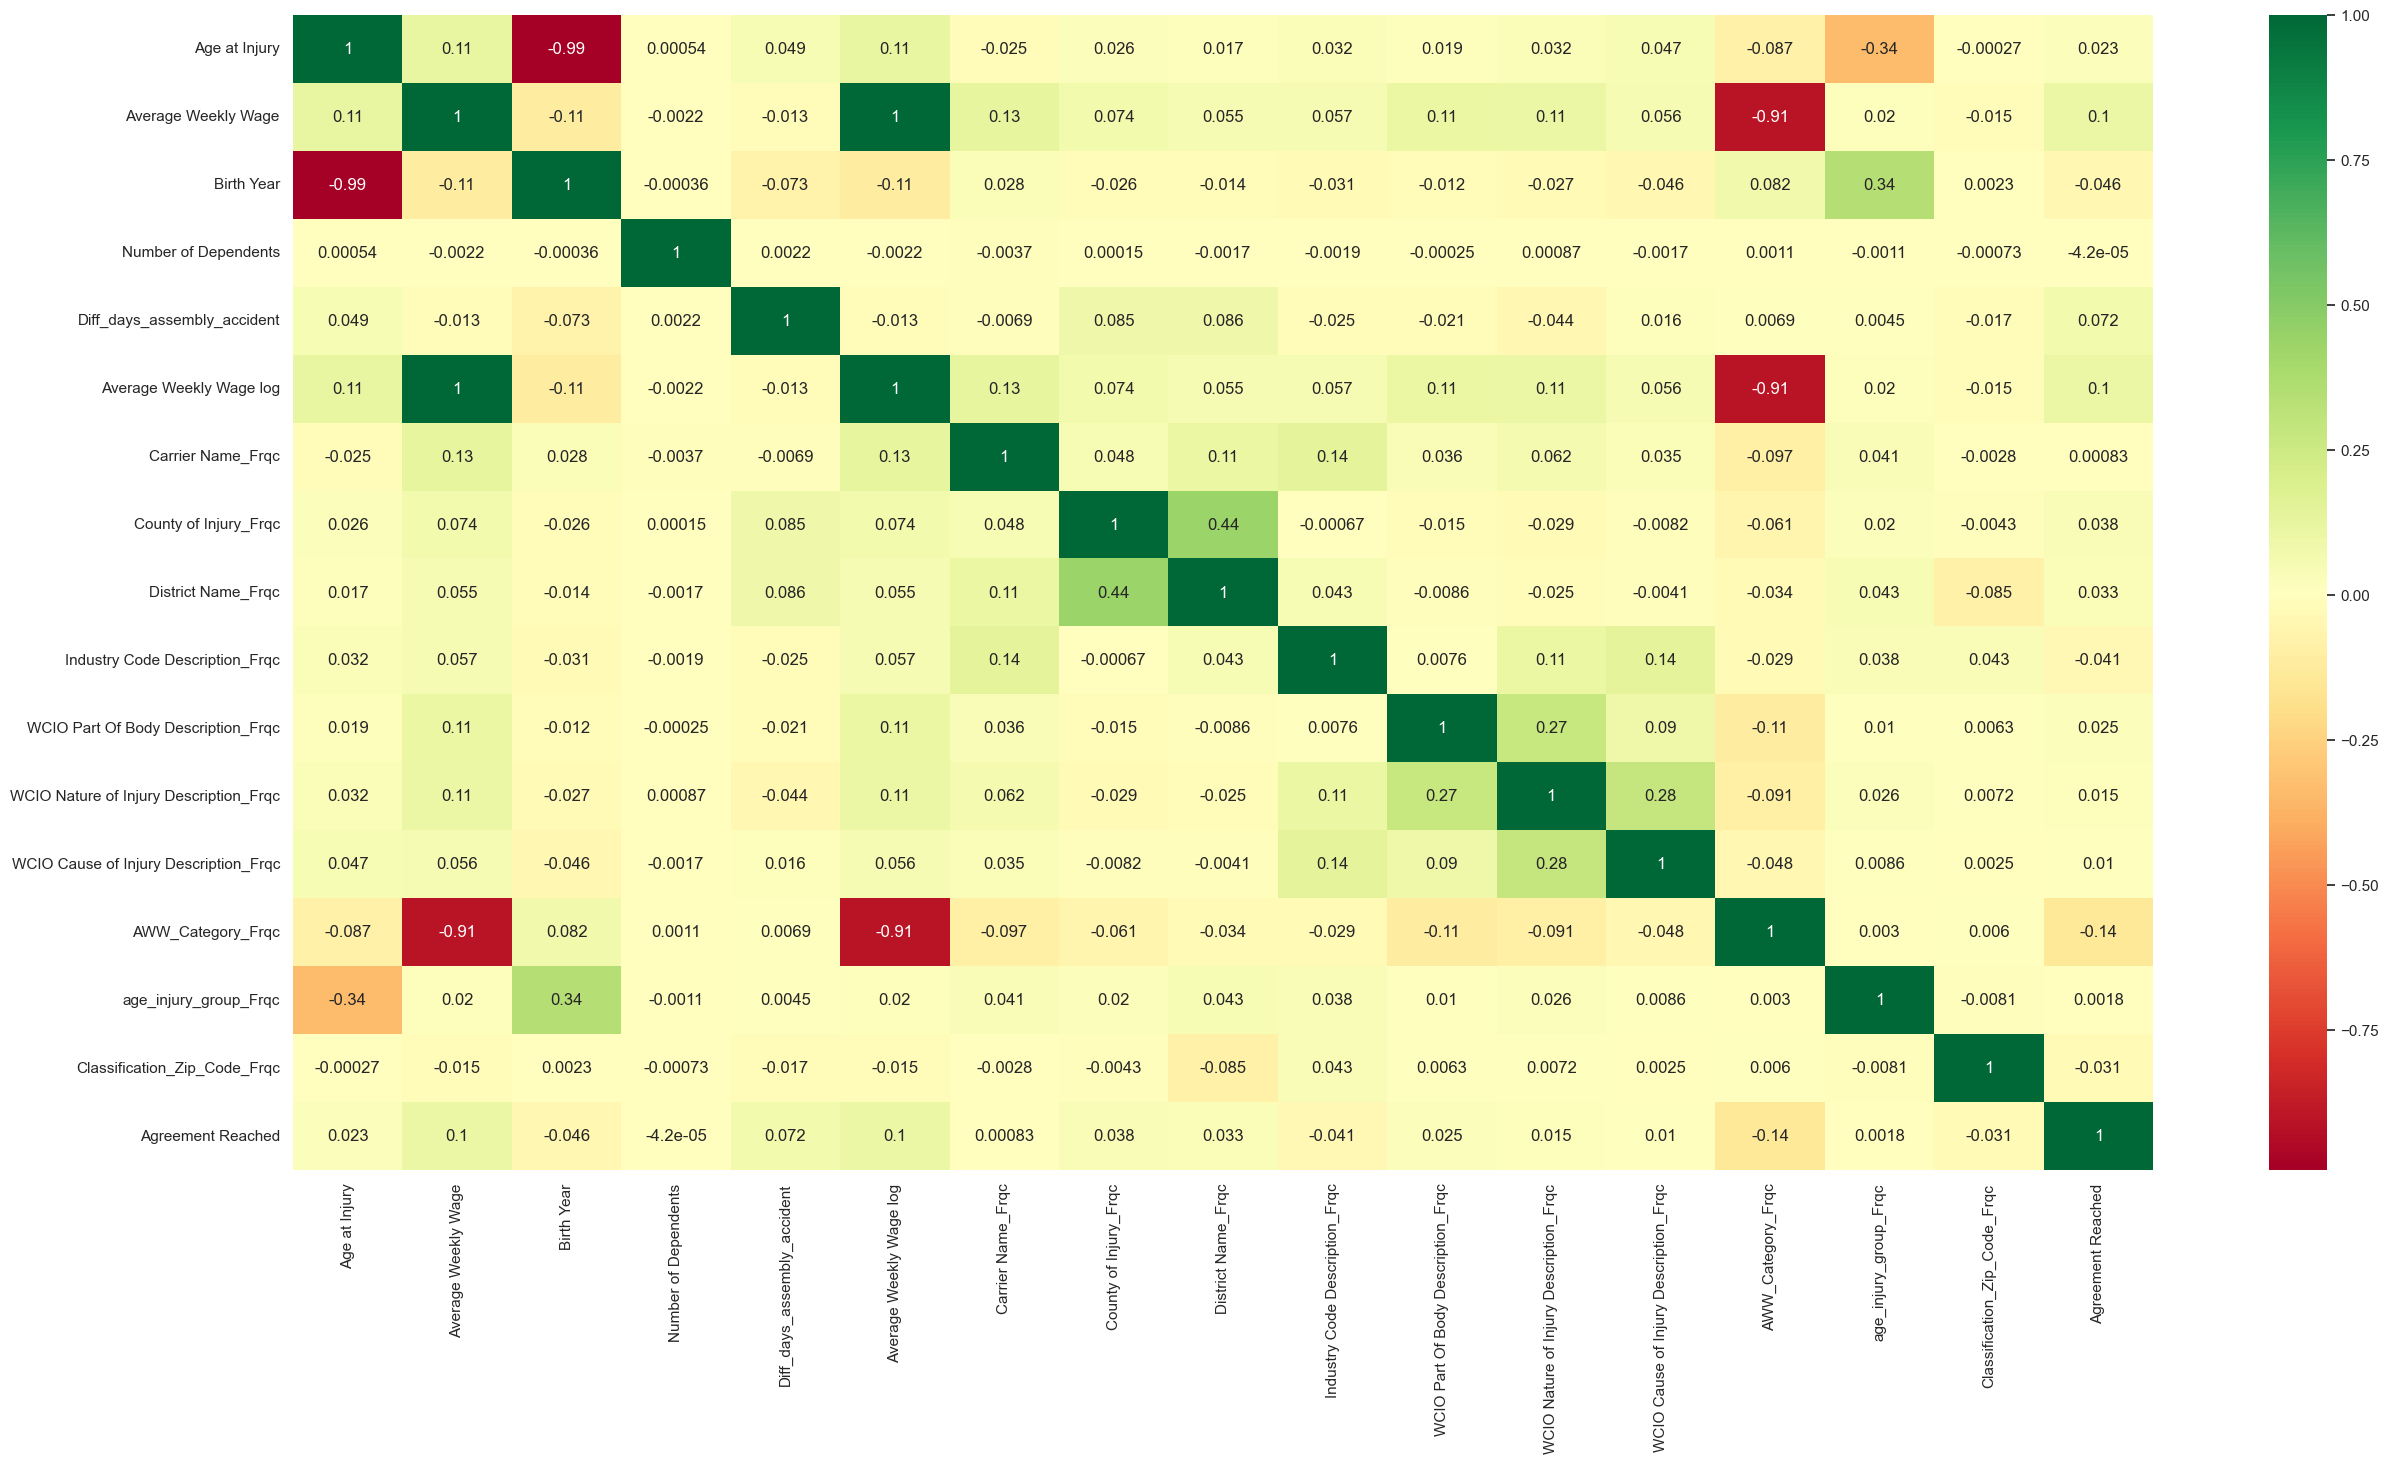

In [343]:
#plot heat map
X_train_and_target= pd.concat([X_train_num_ar, df_target_train], axis=1)
plt.figure(figsize=(30,15))
sns.heatmap(X_train_and_target.corr(method='spearman'), annot=True, cmap="RdYlGn")

In [344]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is  \033[1;35mIMPORTANT\033[0m for Prediction".format(var)
    else:
        result="{0} is \033[1;36mNOT\033[0m an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [345]:
for var in X_train_cat_ar:
    TestIndependence(X_train_cat_ar[var],y_train, var)

Attorney/Representative is  IMPORTANT for Prediction
has_c3_date is  IMPORTANT for Prediction
COVID-19 Indicator is  IMPORTANT for Prediction
has_first_hearing_date is  IMPORTANT for Prediction
has_ime is  IMPORTANT for Prediction
Alternative Dispute Resolution_N is  IMPORTANT for Prediction
Alternative Dispute Resolution_UNKNOWN is NOT an important predictor. (Discard Alternative Dispute Resolution_UNKNOWN from model)
Alternative Dispute Resolution_Y is  IMPORTANT for Prediction
Carrier Type_1A. PRIVATE is  IMPORTANT for Prediction
Carrier Type_2A. SIF is  IMPORTANT for Prediction
Carrier Type_3A. SELF PUBLIC is  IMPORTANT for Prediction
Carrier Type_4A. SELF PRIVATE is  IMPORTANT for Prediction
Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A) is NOT an important predictor. (Discard Carrier Type_5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A) from model)
Carrier Type_5C. SPECIAL FUND - POI CARRIER WCB MENANDS is  IMPORTANT for Prediction
Carrier Type_5D. SPECIAL FUND - UNKNOWN is 

#### Cramers' V

In [346]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

In [347]:
df_cramers = pd.concat([X_train_cat_ar, df_target_train], axis=1)
results = pd.DataFrame(index=df_cramers.columns, columns=df_cramers.columns)


for var1 in df_cramers.columns:
    for var2 in df_cramers.columns:
        if var1 != var2:
            results.loc[var1, var2] = cramers_v(df_cramers[var1], df_cramers[var2])
        else:
            results.loc[var1, var2] = 1  #perfect association with itself


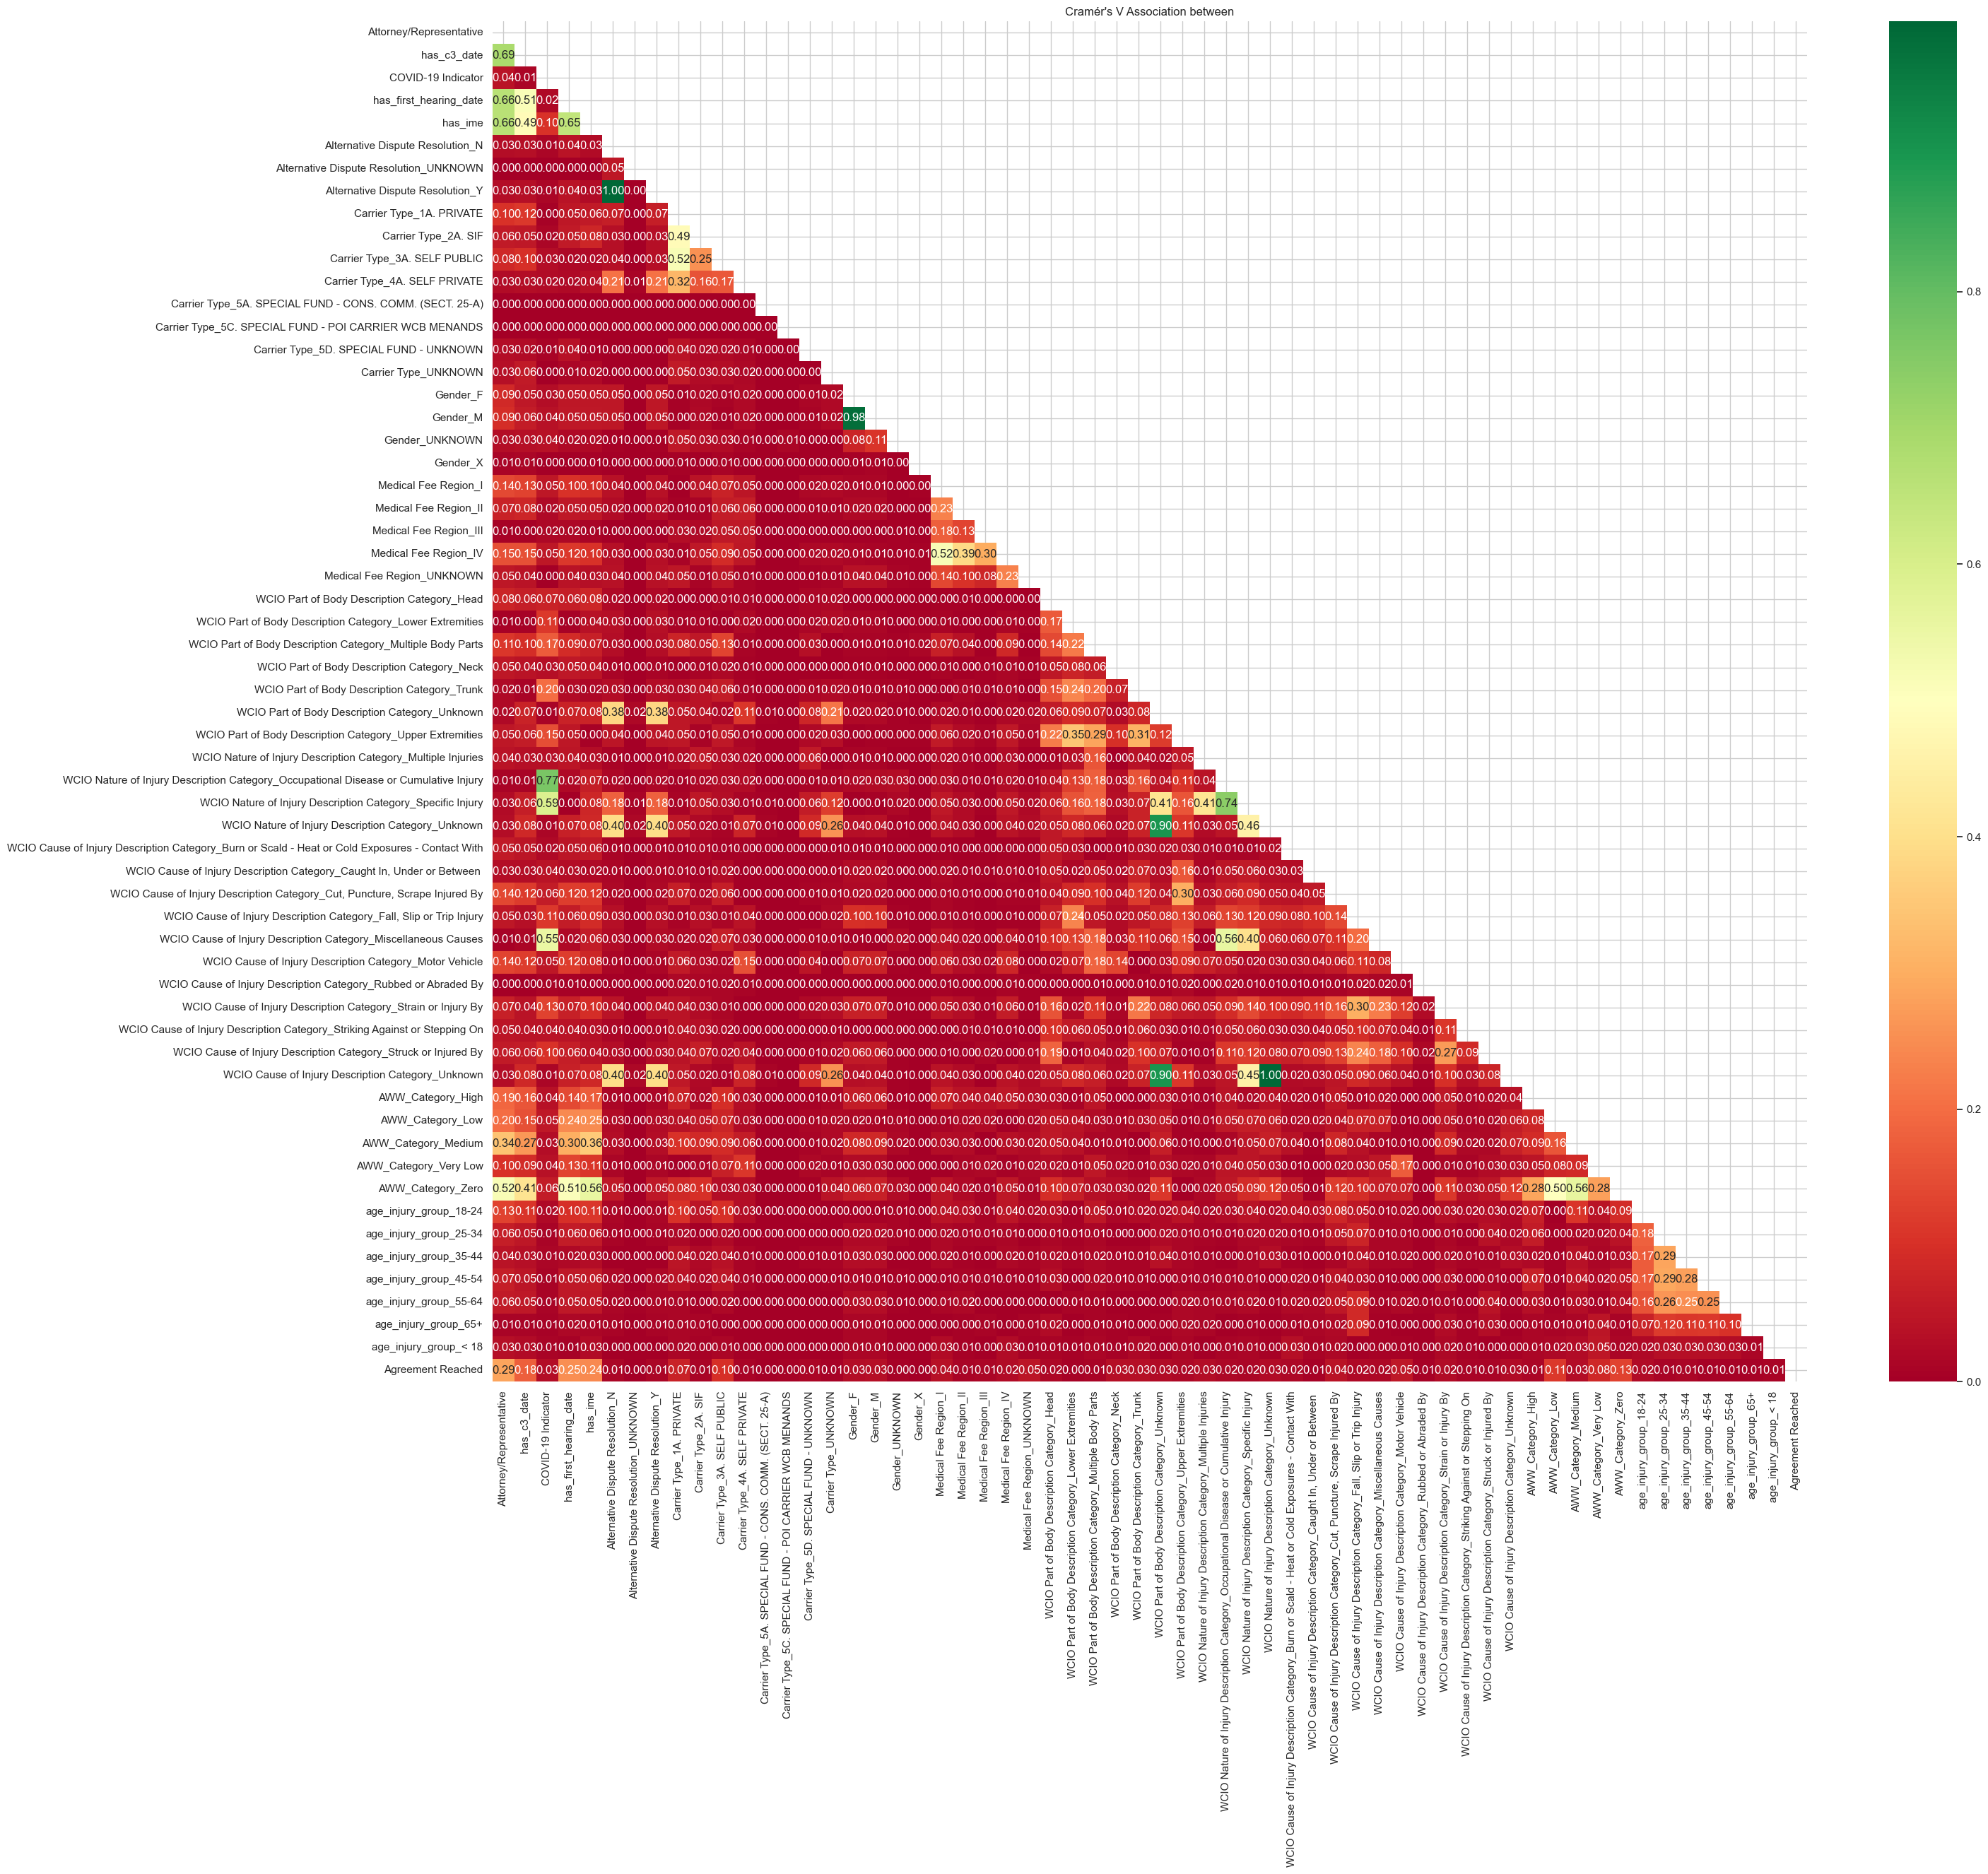

In [348]:
#Heatmap of Cramér's V
results = results.astype(float)
mask = np.triu(np.ones_like(results, dtype=bool))
plt.figure(figsize=(30, 25))
sns.heatmap(results, annot=True, cmap="RdYlGn", cbar=True, mask=mask, fmt='.2f', linewidths=0, linecolor='white')
plt.title("Cramér's V Association between")

plt.show()

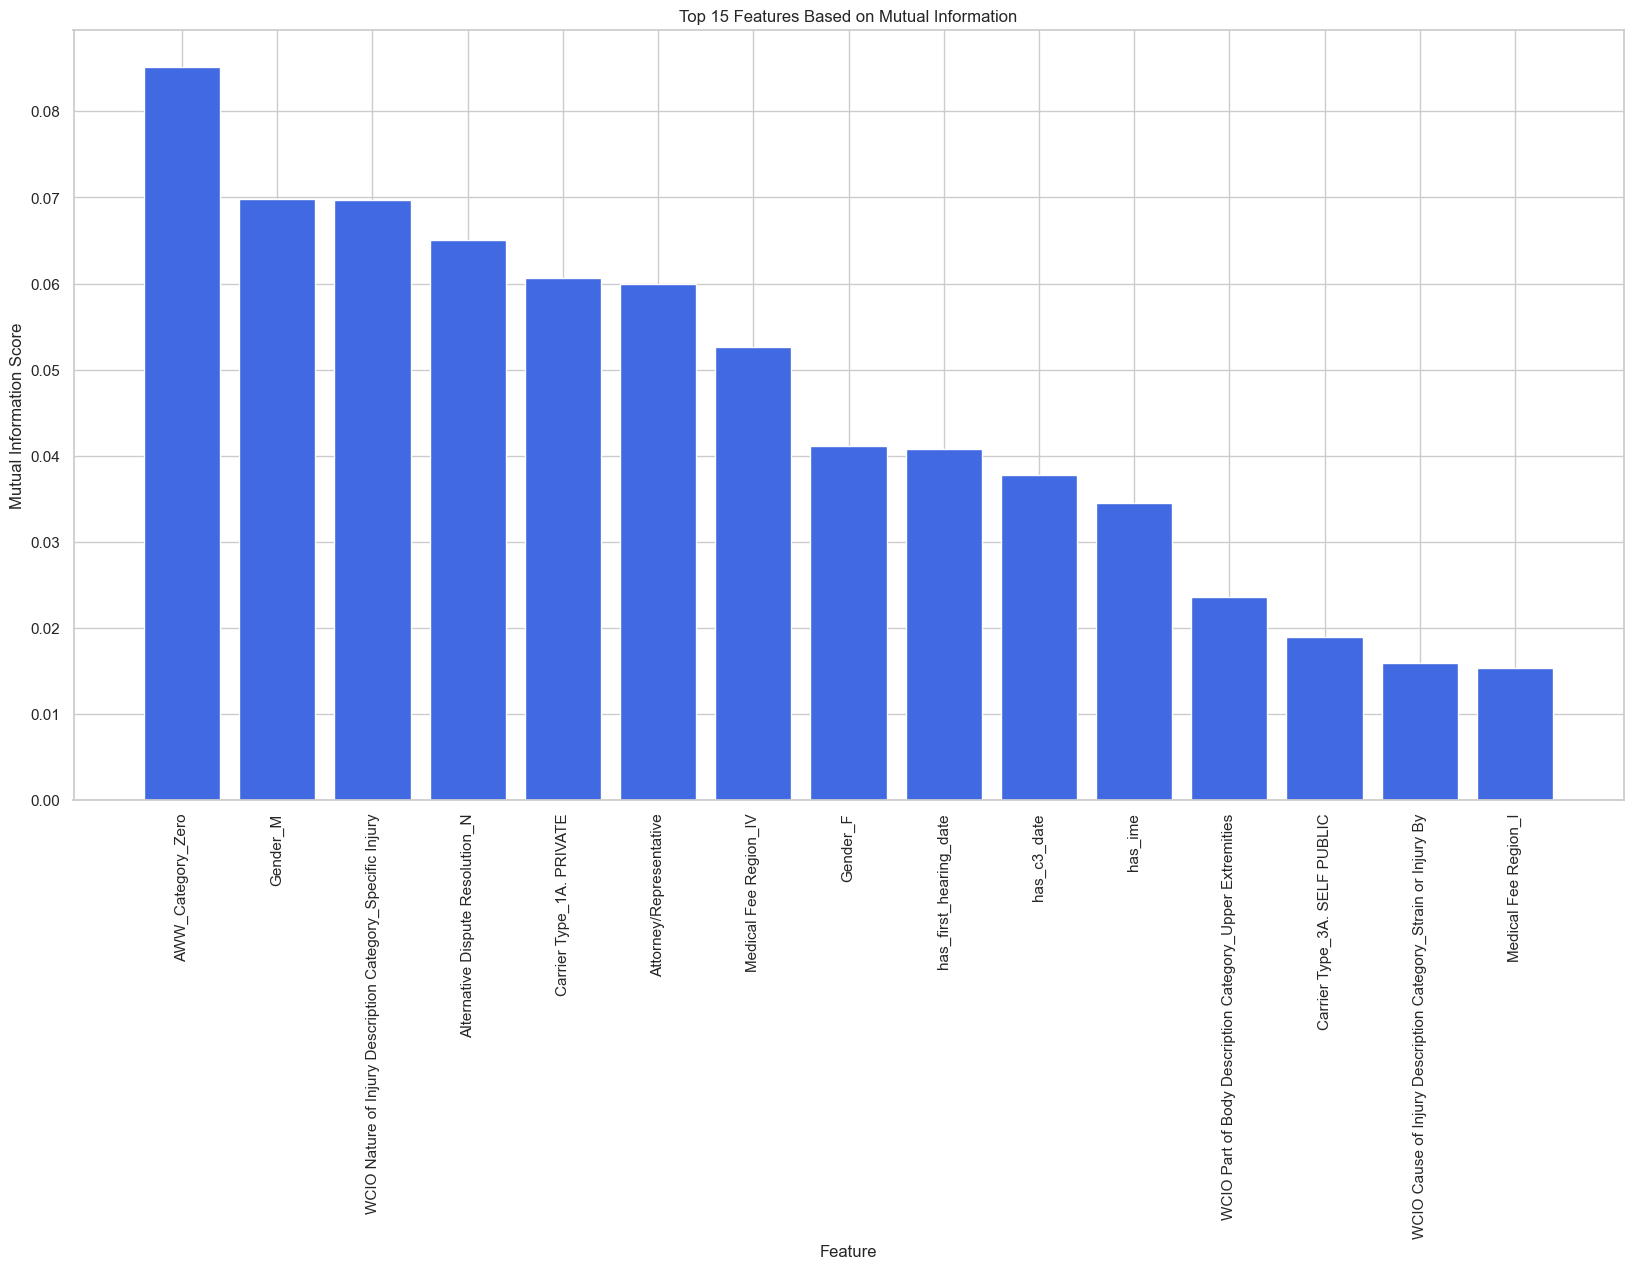

In [349]:
threshold = 15  
high_score_features_MIC = []
scores = []
names_MIC = []

feature_scores = mutual_info_classif(X_train_cat_ar, y_train)

for score, f_name in sorted(zip(feature_scores, X_train_cat_ar.columns), reverse=True)[:threshold]:
    high_score_features_MIC.append(f_name)
    scores.append(score)
    names_MIC.append(f_name)

plt.figure(figsize=(20, 10))
plt.bar(names_MIC, scores, color='royalblue')
plt.xticks(rotation=90)
plt.ylabel('Mutual Information Score')
plt.xlabel('Feature')
plt.title(f'Top {threshold} Features Based on Mutual Information')
plt.show()

**`Use the following features`**

In [350]:
names_MIC

['AWW_Category_Zero',
 'Gender_M',
 'WCIO Nature of Injury Description Category_Specific Injury',
 'Alternative Dispute Resolution_N',
 'Carrier Type_1A. PRIVATE',
 'Attorney/Representative',
 'Medical Fee Region_IV',
 'Gender_F',
 'has_first_hearing_date',
 'has_c3_date',
 'has_ime',
 'WCIO Part of Body Description Category_Upper Extremities',
 'Carrier Type_3A. SELF PUBLIC',
 'WCIO Cause of Injury Description Category_Strain or Injury By',
 'Medical Fee Region_I']

<a class="anchor" id="7">

# Models
    
</a>

In [351]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

## Logistic Regression

In [352]:
## logistic regression - balacend,MIC features
lr_b = LogisticRegression(class_weight='balanced')
lr_b.fit(X_train_all_ar[names_MIC], y_train)
y_pred_train_lr_b = lr_b.predict(X_train_all_ar[names_MIC])
y_pred_val_lr_b = lr_b.predict(X_val_all_ar[names_MIC])
metrics(y_train, y_pred_train_lr_b, y_val, y_pred_val_lr_b)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.80      0.89    382507
           1       0.18      0.89      0.30     18728

    accuracy                           0.81    401235
   macro avg       0.59      0.85      0.60    401235
weighted avg       0.96      0.81      0.86    401235

[[307423  75084]
 [  2070  16658]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
--------------------------------------------------------------------------------------------------

In [353]:
lr_params={'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [354]:
lr_b_2 = LogisticRegression(**lr_params,class_weight='balanced')
lr_b_2.fit(X_train_all_ar[names_MIC], y_train)
y_pred_train_lr_b_2 = lr_b_2.predict(X_train_all_ar[names_MIC])
y_pred_val_lr_b_2 = lr_b_2.predict(X_val_all_ar[names_MIC])
metrics(y_train, y_pred_train_lr_b_2, y_val, y_pred_val_lr_b_2)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.80      0.89    382507
           1       0.18      0.89      0.30     18728

    accuracy                           0.81    401235
   macro avg       0.59      0.85      0.59    401235
weighted avg       0.96      0.81      0.86    401235

[[307264  75243]
 [  2070  16658]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
--------------------------------------------------------------------------------------------------

## Categorical Naive Bayes

In [355]:
modelCNB = CategoricalNB()
modelCNB.fit(X_train_all_ar[names_MIC], y = y_train)
labels_train_cnb = modelCNB.predict(X_train_all_ar[names_MIC])
labels_val_cnb =modelCNB.predict(X_val_all_ar[names_MIC])
metrics(target_train, labels_train_cnb, target_val, labels_val_cnb)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93    382507
         1.0       0.21      0.61      0.31     18728

    accuracy                           0.87    401235
   macro avg       0.59      0.75      0.62    401235
weighted avg       0.94      0.87      0.90    401235

[[338903  43604]
 [  7349  11379]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
--------------------------------------------------------------------------------------------------

## DECISION TREES

In [356]:
## feature selection with MIC, max_depth = 15,min_samples_split= 50,

In [357]:
DT_v3 =  DecisionTreeClassifier(criterion='entropy',max_depth = 15,min_samples_split= 50,
                                class_weight= 'balanced').fit(X_train_all_ar[names_MIC], y_train)
y_pred_train_dt_v3 = DT_v3.predict(X_train_all_ar[names_MIC])
y_pred_val_dt_v3 = DT_v3.predict(X_val_all_ar[names_MIC])
metrics(y_train, y_pred_train_dt_v3, y_val, y_pred_val_dt_v3)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.81      0.89    382507
           1       0.19      0.92      0.31     18728

    accuracy                           0.81    401235
   macro avg       0.59      0.86      0.60    401235
weighted avg       0.96      0.81      0.86    401235

[[308329  74178]
 [  1475  17253]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
--------------------------------------------------------------------------------------------------

In [358]:
DT_v4 =  DecisionTreeClassifier(criterion='entropy',max_depth = 10,min_samples_split= 500,
                                class_weight= 'balanced').fit(X_train_all_ar[names_MIC], y_train)
y_pred_train_dt_v4 = DT_v4.predict(X_train_all_ar[names_MIC])
y_pred_val_dt_v4 = DT_v4.predict(X_val_all_ar[names_MIC])
metrics(y_train, y_pred_train_dt_v4, y_val, y_pred_val_dt_v4)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.80      0.89    382507
           1       0.18      0.92      0.31     18728

    accuracy                           0.81    401235
   macro avg       0.59      0.86      0.60    401235
weighted avg       0.96      0.81      0.86    401235

[[306303  76204]
 [  1585  17143]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
--------------------------------------------------------------------------------------------------

In [359]:
## this is getting the best scores, without overfitting and reducing the complexity of the parametrs

In [360]:
DT_v5 =  DecisionTreeClassifier(criterion='entropy', min_samples_split= 500, max_depth = 8,
                                class_weight= 'balanced').fit(X_train_all_ar[names_MIC], y_train)
y_pred_train_dt_v5 = DT_v5.predict(X_train_all_ar[names_MIC])
y_pred_val_dt_v5 = DT_v5.predict(X_val_all_ar[names_MIC])
metrics(y_train, y_pred_train_dt_v5, y_val, y_pred_val_dt_v5)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.79      0.88    382507
           1       0.18      0.92      0.30     18728

    accuracy                           0.80    401235
   macro avg       0.59      0.86      0.59    401235
weighted avg       0.96      0.80      0.86    401235

[[303738  78769]
 [  1500  17228]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
--------------------------------------------------------------------------------------------------

In [361]:
importances = pd.DataFrame(DT_v5.feature_importances_, index=names_MIC, columns=['importance'])
importances = importances.sort_values(by='importance', ascending=False)

print(importances)

                                                    importance
Attorney/Representative                               0.703221
Carrier Type_3A. SELF PUBLIC                          0.133246
has_ime                                               0.047238
has_first_hearing_date                                0.027740
has_c3_date                                           0.027373
AWW_Category_Zero                                     0.019566
Medical Fee Region_IV                                 0.012392
Carrier Type_1A. PRIVATE                              0.011464
WCIO Nature of Injury Description Category_Spec...    0.004609
WCIO Cause of Injury Description Category_Strai...    0.003105
WCIO Part of Body Description Category_Upper Ex...    0.002554
Gender_M                                              0.002484
Medical Fee Region_I                                  0.002450
Alternative Dispute Resolution_N                      0.001395
Gender_F                                              0

## Random Forest

In [362]:
rf= RandomForestClassifier(criterion='entropy',max_depth = 10, random_state = 0, n_estimators=1000, min_samples_leaf = 10, class_weight= 'balanced').fit(X_train_all_ar[names_MIC], y_train)
y_pred_train_rf = rf.predict(X_train_all_ar[names_MIC])
y_pred_val_rf = rf.predict(X_val_all_ar[names_MIC])
metrics(y_train, y_pred_train_rf, y_val, y_pred_val_rf)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    382507
           1       0.18      0.92      0.31     18728

    accuracy                           0.81    401235
   macro avg       0.59      0.86      0.60    401235
weighted avg       0.96      0.81      0.86    401235

[[306103  76404]
 [  1534  17194]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
--------------------------------------------------------------------------------------------------

In [363]:
importances = pd.DataFrame(rf.feature_importances_, index=names_MIC, columns=['importance'])
importances = importances.sort_values(by='importance', ascending=False)

print(importances)

                                                    importance
Attorney/Representative                               0.418604
has_first_hearing_date                                0.161863
has_ime                                               0.127173
Carrier Type_3A. SELF PUBLIC                          0.113393
has_c3_date                                           0.068489
AWW_Category_Zero                                     0.033711
Carrier Type_1A. PRIVATE                              0.029262
Medical Fee Region_IV                                 0.010647
WCIO Cause of Injury Description Category_Strai...    0.006844
Medical Fee Region_I                                  0.006825
WCIO Nature of Injury Description Category_Spec...    0.006409
Gender_F                                              0.005368
WCIO Part of Body Description Category_Upper Ex...    0.005158
Gender_M                                              0.004953
Alternative Dispute Resolution_N                      0

In [364]:
# rf= RandomForestClassifier(criterion='entropy',max_depth = 20, random_state = 0, n_estimators=1000, min_samples_leaf = 5, class_weight= 'balanced').fit(X_train_all_ar[names_MIC], y_train)
# y_pred_train_rf = rf.predict(X_train_all_ar[names_MIC])
# y_pred_val_rf = rf.predict(X_val_all_ar[names_MIC])
# metrics(y_train, y_pred_train_rf, y_val, y_pred_val_rf)

## GaussianNB

In [365]:
nb= GaussianNB().fit(X_train_all_ar[names_MIC], y_train)
y_pred_train_nb= nb.predict(X_train_all_ar[names_MIC])
y_pred_val_nb = nb.predict(X_val_all_ar[names_MIC])
metrics(y_train, y_pred_train_nb, y_val, y_pred_val_nb)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.74      0.85    382507
           1       0.15      0.93      0.26     18728

    accuracy                           0.75    401235
   macro avg       0.57      0.83      0.55    401235
weighted avg       0.96      0.75      0.82    401235

[[283813  98694]
 [  1393  17335]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
--------------------------------------------------------------------------------------------------

## Analysis of all models

In [366]:
model_list = []

In [367]:
decision_tree = DecisionTreeClassifier(criterion='entropy', min_samples_split= 500, max_depth = 8,class_weight= 'balanced')
random_forest = RandomForestClassifier(criterion='entropy',max_depth = 10, random_state = 0, n_estimators=1000, min_samples_leaf = 10, class_weight= 'balanced')
cbn = CategoricalNB()
logistic= LogisticRegression(**lr_params,class_weight='balanced')
nb= GaussianNB()

In [368]:
model_list.append(decision_tree)
model_list.append(random_forest)
model_list.append(cbn)
model_list.append(logistic)
model_list.append(nb)


In [369]:
results_of_models=[]
for model in model_list:
    # Record the start time
    start_time = time.time()

    # Fit the model on the training set

    model.fit(X_train_all_ar[names_MIC], y_train)

    y_pred_train = model.predict(X_train_all_ar[names_MIC])
    y_pred_val = model.predict(X_val_all_ar[names_MIC])
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    ## precision 
    train_precision = precision_score(y_train, y_pred_train)
    val_precision = precision_score(y_val, y_pred_val)
    ## recall
    train_recall = recall_score(y_train, y_pred_train)
    val_recall = recall_score(y_val, y_pred_val)
    # Compute macro-averaged F1 score
    train_f1_macro = f1_score(y_train, y_pred_train, average='macro')
    val_f1_macro = f1_score(y_val, y_pred_val, average='macro')
        

    # Record the end time and calculate the duration
    end_time = time.time()
    duration = end_time - start_time
    
    # Save the results
    results_of_models.append({
        'Model:': model,
        'train accuracy': train_accuracy,
        'train precision': train_precision,
        'train recall': train_recall,
        'train_f1_macro': train_f1_macro,
        'val accuracy': val_accuracy,
        'val precision' : val_precision,
        'val recall': val_recall,
        'val_f1_macro': val_f1_macro,
        'time': duration
    })

# Convert results to a DataFrame and sort by F1 Macro score
results_df = pd.DataFrame(results_of_models).sort_values(by='val_f1_macro', ascending=False)

In [370]:
print("\nAll Results:")
results_df


All Results:


,Model:,train accuracy,train precision,train recall,train_f1_macro,val accuracy,val precision,val recall,val_f1_macro,time
2,CategoricalNB(),0.873010,0.206955,0.607593,0.619414,0.872776,0.206665,0.608138,0.619218,1.528575
1,"(DecisionTreeClassifier(criterion='entropy', m...",0.805755,0.183701,0.918091,0.596607,0.804121,0.180954,0.906794,0.593892,309.373424
3,"LogisticRegression(C=0.01, class_weight='balan...",0.807312,0.181260,0.889470,0.594701,0.806740,0.180386,0.886511,0.593837,2.614969
0,DecisionTreeClassifier(class_weight='balanced'...,0.799945,0.179464,0.919906,0.591811,0.798273,0.177227,0.912270,0.589521,1.694836
4,GaussianNB(),0.750553,0.149402,0.925619,0.553691,0.749936,0.149035,0.925460,0.553204,1.264767


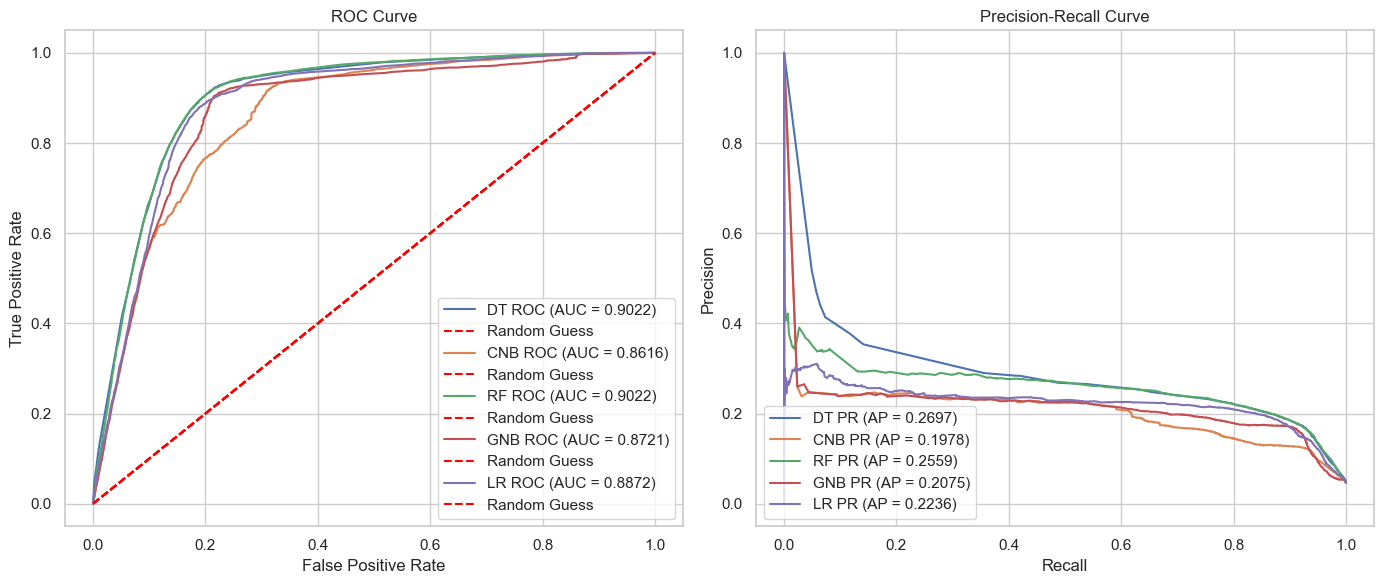

In [371]:

five_models = [
    {'label': 'DT', 'model': decision_tree},  
    {'label': 'CNB', 'model': cbn},
    {'label': 'RF', 'model': random_forest},
    {'label': 'GNB', 'model': nb},
    {'label': 'LR', 'model': logistic}
]

# Set up for plotting
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

for model in five_models:
    model_to_use = model['model']
    y_pred_proba = model_to_use.predict_proba(X_val_all_ar[names_MIC])[:, 1]  
    
    # Calculate ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    
    # Calculate PR Curve and AUPRC
    precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)
    pr_auc = average_precision_score(y_val, y_pred_proba)
    
    # Plot ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'{model["label"]} ROC (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    
    # Plot PR Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'{model["label"]} PR (AP = {pr_auc:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

# Show the plot
plt.tight_layout()
plt.show()

In [372]:
for model in five_models:
    model_to_use = model['model']
    y_pred_proba = model_to_use.predict_proba(X_val_all_ar[names_MIC])[:, 1]  
    
    # Calculate ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    
    # Calculate PR Curve and AUPRC
    precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)
    pr_auc = average_precision_score(y_val, y_pred_proba)   
    print(f"{model['label']} AUROC Score: {roc_auc:.4f}")
    print(f"{model['label']} AUPRC Score: {pr_auc:.4f}")

DT AUROC Score: 0.9022
DT AUPRC Score: 0.2697
CNB AUROC Score: 0.8616
CNB AUPRC Score: 0.1978
RF AUROC Score: 0.9022
RF AUPRC Score: 0.2559
GNB AUROC Score: 0.8721
GNB AUPRC Score: 0.2075
LR AUROC Score: 0.8872
LR AUPRC Score: 0.2236


## Final Model

In [373]:
final_estimator = nb

# Create the Stacking model
stacking_model = StackingClassifier(
    estimators=[('dt', decision_tree), ('rf', random_forest)],  
    final_estimator=final_estimator,      
)

# Train the stacking model
stacking_model.fit(X_train_all_ar[names_MIC], y_train)

# Make predictions
y_pred_train_stack = stacking_model.predict(X_train_all_ar[names_MIC])
y_pred_val_stack = stacking_model.predict(X_val_all_ar[names_MIC])


In [374]:
metrics(y_train,y_pred_train_stack,y_val,y_pred_val_stack)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.85      0.92    382507
           1       0.22      0.84      0.34     18728

    accuracy                           0.85    401235
   macro avg       0.60      0.85      0.63    401235
weighted avg       0.95      0.85      0.89    401235

[[325596  56911]
 [  3001  15727]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
--------------------------------------------------------------------------------------------------

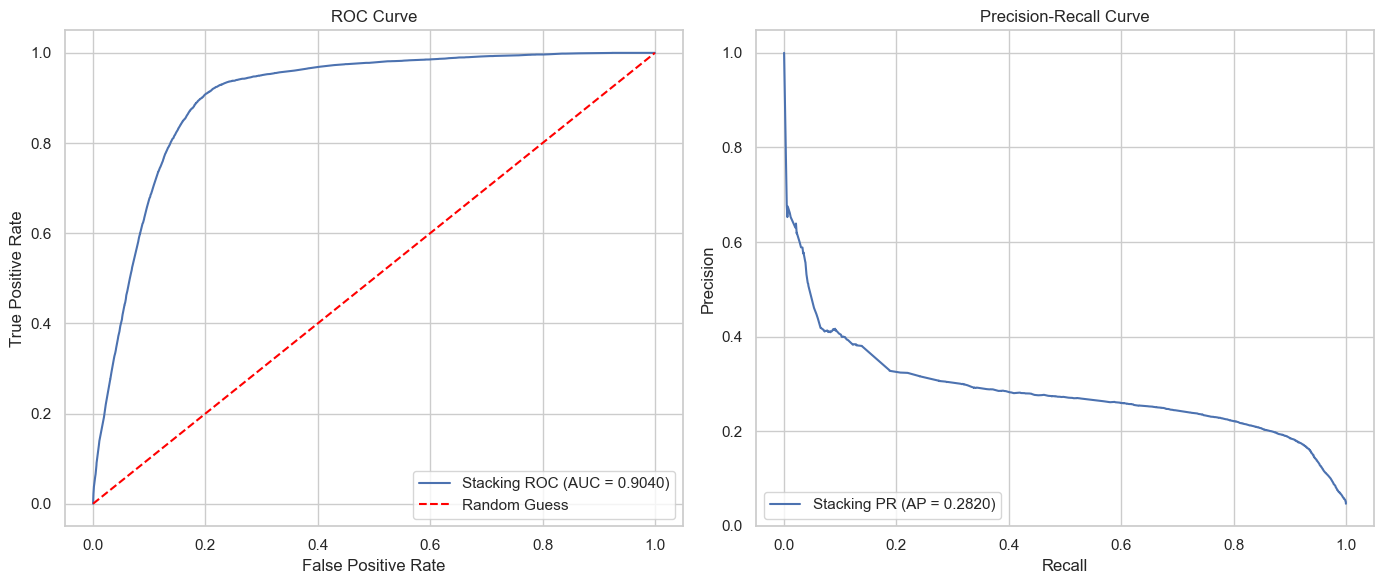

In [375]:

sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))
y_pred_proba = stacking_model.predict_proba(X_val_all_ar[names_MIC])[:, 1]  
    
# Calculate ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Calculate PR Curve and AUPRC
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)
pr_auc = average_precision_score(y_val, y_pred_proba)

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'Stacking ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Plot PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'Stacking PR (AP = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Show the plot
plt.tight_layout()
plt.show()

In [376]:

final_model_to_use = stacking_model
final_y_pred_proba = final_model_to_use.predict_proba(X_val_all_ar[names_MIC])[:, 1]  

# Calculate ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_val, final_y_pred_proba)
roc_auc = roc_auc_score(y_val, final_y_pred_proba)

# Calculate PR Curve and AUPRC
precision, recall, _ = precision_recall_curve(y_val, final_y_pred_proba)
pr_auc = average_precision_score(y_val, final_y_pred_proba)   
print(f"Stacking AUROC Score: {roc_auc:.4f}")
print(f"Stacking AUPRC Score: {pr_auc:.4f}")

Stacking AUROC Score: 0.9040
Stacking AUPRC Score: 0.2820
